# **Predicting Approximate Total Revenue Using Various Regression Techniques**





**Group Members:**


    





1. 202418013 - Darshita Dwivedi
2. 202418025 - Kelvi Bhesdadiya
3. 202418057 - Eric Thomas
4. 202418058 - Ujjwal Bhansali   





**Importing essential libraries for data manipulation, preprocessing, regression models, evaluation metrics, and visualization.**

In [1]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Machine learning and preprocessing
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**The dataset used in this project is sourced from Kaggle: https://www.kaggle.com/datasets/suraj520/dairy-goods-sales-dataset/data**


In [2]:
df = pd.read_csv("dairy_dataset.csv", parse_dates=['Production Date','Expiration Date','Date'])

<ipython-input-2-d267898b9f4b>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("dairy_dataset.csv", parse_dates=['Production Date','Expiration Date','Date'])
<ipython-input-2-d267898b9f4b>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("dairy_dataset.csv", parse_dates=['Production Date','Expiration Date','Date'])
<ipython-input-2-d267898b9f4b>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("dairy_dataset.csv", parse_dates=['Production Date','Expiration Date','Date'])


**About Dataset**

It provides a detailed and comprehensive collection of data related to dairy farms, dairy products, sales, and inventory management


In [3]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')


## **Exploratory Data Analysis**

In [4]:
df.describe()

Total Land Area (acres)  Number of Cows                           Date  \
count              4325.000000     4325.000000                           4325   
mean                503.483073       54.963699  2020-12-15 22:59:04.231213824   
min                  10.170000       10.000000            2019-01-01 00:00:00   
25%                 252.950000       32.000000            2019-12-20 00:00:00   
50%                 509.170000       55.000000            2020-12-02 00:00:00   
75%                 751.250000       77.000000            2021-12-15 00:00:00   
max                 999.530000      100.000000            2022-12-28 00:00:00   
std                 285.935061       26.111487                            NaN   

        Product ID  Quantity (liters/kg)  Price per Unit   Total Value  \
count  4325.000000           4325.000000     4325.000000   4325.000000   
mean      5.509595            500.652657       54.785938  27357.845411   
min       1.000000              1.170000       10.030000     42.516500   
25%       3.000000            254.170000       32.460000   9946.814500   
50%       6.000000            497.550000       54.400000  21869.652900   
75%       8.000000            749.780000       77.460000  40954.441000   
max      10.000000            999.930000       99.990000  99036.369600   
std       2.842979            288.975915       26.002815  21621.051594   

       Shelf Life (days)                Production Date  \
count        4325.000000                           4325   
mean           29.127630  2020-11-15 08:53:22.959537664   
min             1.000000            2018-11-02 00:00:00   
25%            10.000000            2019-11-23 00:00:00   
50%            22.000000            2020-10-29 00:00:00   
75%            30.000000            2021-11-16 00:00:00   
max           150.000000            2022-12-22 00:00:00   
std            30.272114                            NaN   

                     Expiration Date  Quantity Sold (liters/kg)  \
count                           4325                4325.000000   
mean   2020-12-14 11:57:10.196531968                 248.095029   
min              2018-11-14 00:00:00                   1.000000   
25%              2019-12-20 00:00:00                  69.000000   
50%              2020-11-29 00:00:00                 189.000000   
75%              2021-12-13 00:00:00                 374.000000   
max              2023-05-17 00:00:00                 960.000000   
std                              NaN                 217.024182   

       Price per Unit (sold)  Approx. Total Revenue(INR)  \
count             4325.00000                 4325.000000   
mean                54.77914                13580.265401   
min                  5.21000                   12.540000   
25%                 32.64000                 2916.650000   
50%                 54.14000                 8394.540000   
75%                 77.46000                19504.550000   
max                104.51000                89108.900000   
std                 26.19279                14617.009122   

       Quantity in Stock (liters/kg)  Minimum Stock Threshold (liters/kg)  \
count                    4325.000000                          4325.000000   
mean                      252.068671                            55.826143   
min                         0.000000                            10.020000   
25%                        66.000000                            32.910000   
50%                       191.000000                            56.460000   
75%                       387.000000                            79.010000   
max                       976.000000                            99.990000   
std                       223.620870                            26.301450   

       Reorder Quantity (liters/kg)  
count                   4325.000000  
mean                     109.107820  
min                       20.020000  
25%                       64.280000  
50%                      108.340000  
75%        

**Extracting month, year, and day of the week from 'Production Date', 'Expiration Date', and 'Date' columns to create new features.**

In [5]:
df['Production_Month'] = df['Production Date'].dt.month
df['Production_Year'] = df['Production Date'].dt.year
df['Production_DayofWeek'] = df['Production Date'].dt.dayofweek

df['Expiration_Month'] = df['Expiration Date'].dt.month
df['Expiration_Year'] = df['Expiration Date'].dt.year
df['Expiration_DayofWeek'] = df['Expiration Date'].dt.dayofweek

df['Date_Month'] = df['Date'].dt.month
df['Date_Year'] = df['Date'].dt.year
df['Date_DayofWeek'] = df['Date'].dt.dayofweek

**Creating count plots for categorical variables to visualize the frequency distribution of 'Location', 'Farm Size', 'Product Name', 'Brand', 'Storage Condition', 'Customer Location', and 'Sales Channel'.**

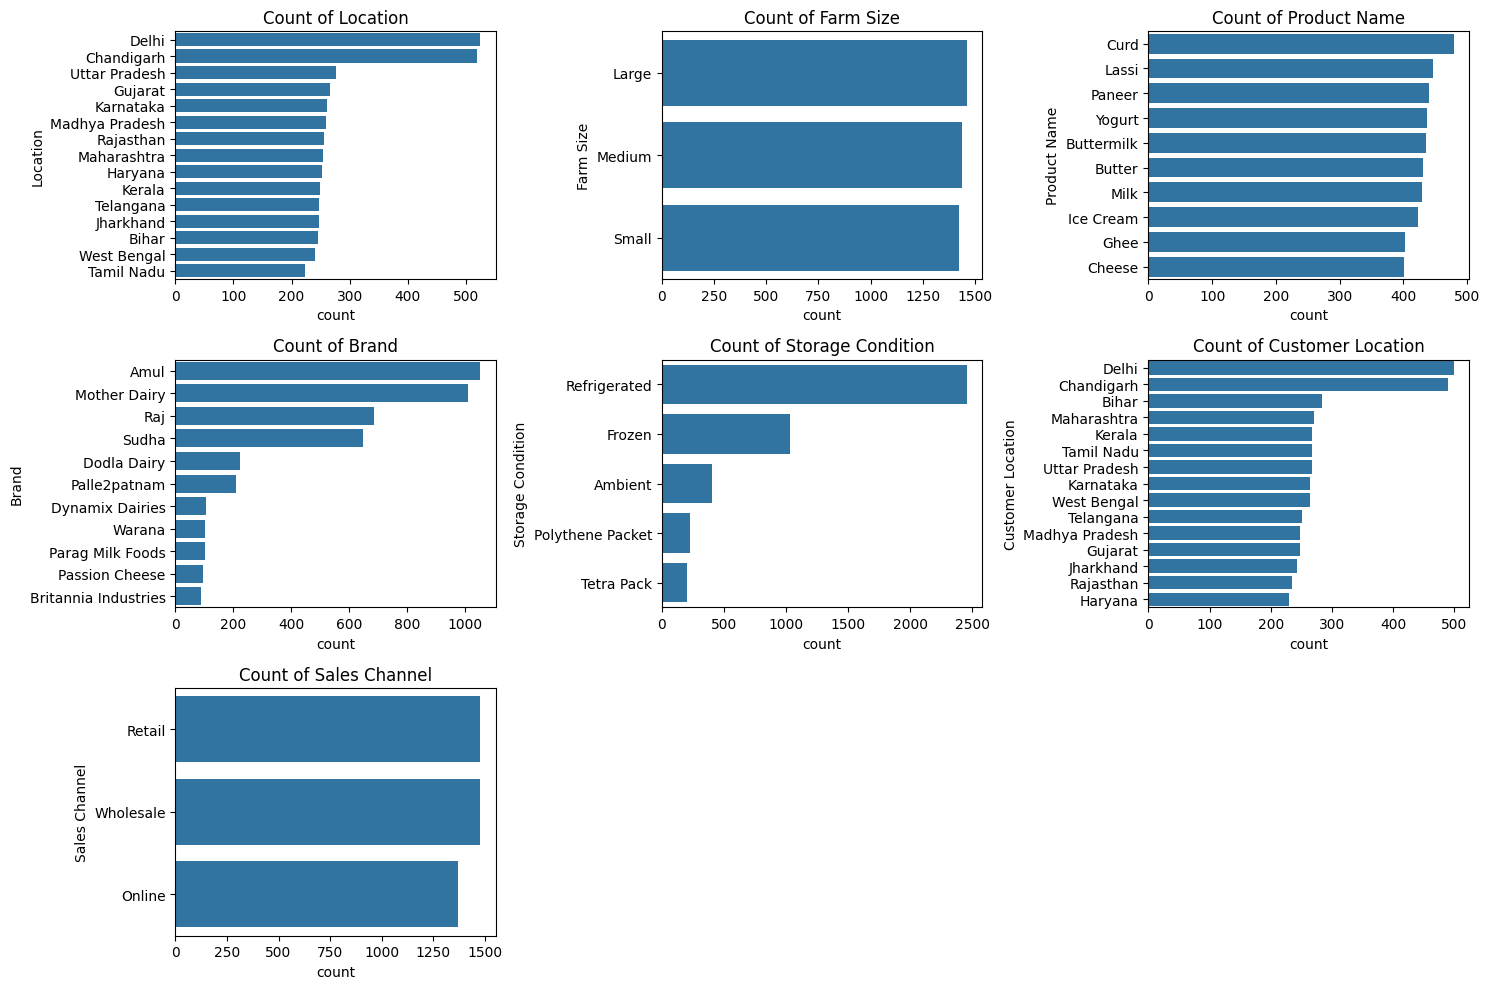

In [6]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Location', 'Farm Size', 'Product Name', 'Brand', 'Storage Condition', 'Customer Location', 'Sales Channel']):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Count of {column}')
plt.tight_layout()
plt.show()

**Creating a heatmap to visualize the quantity of dairy products sold by brand and location.**

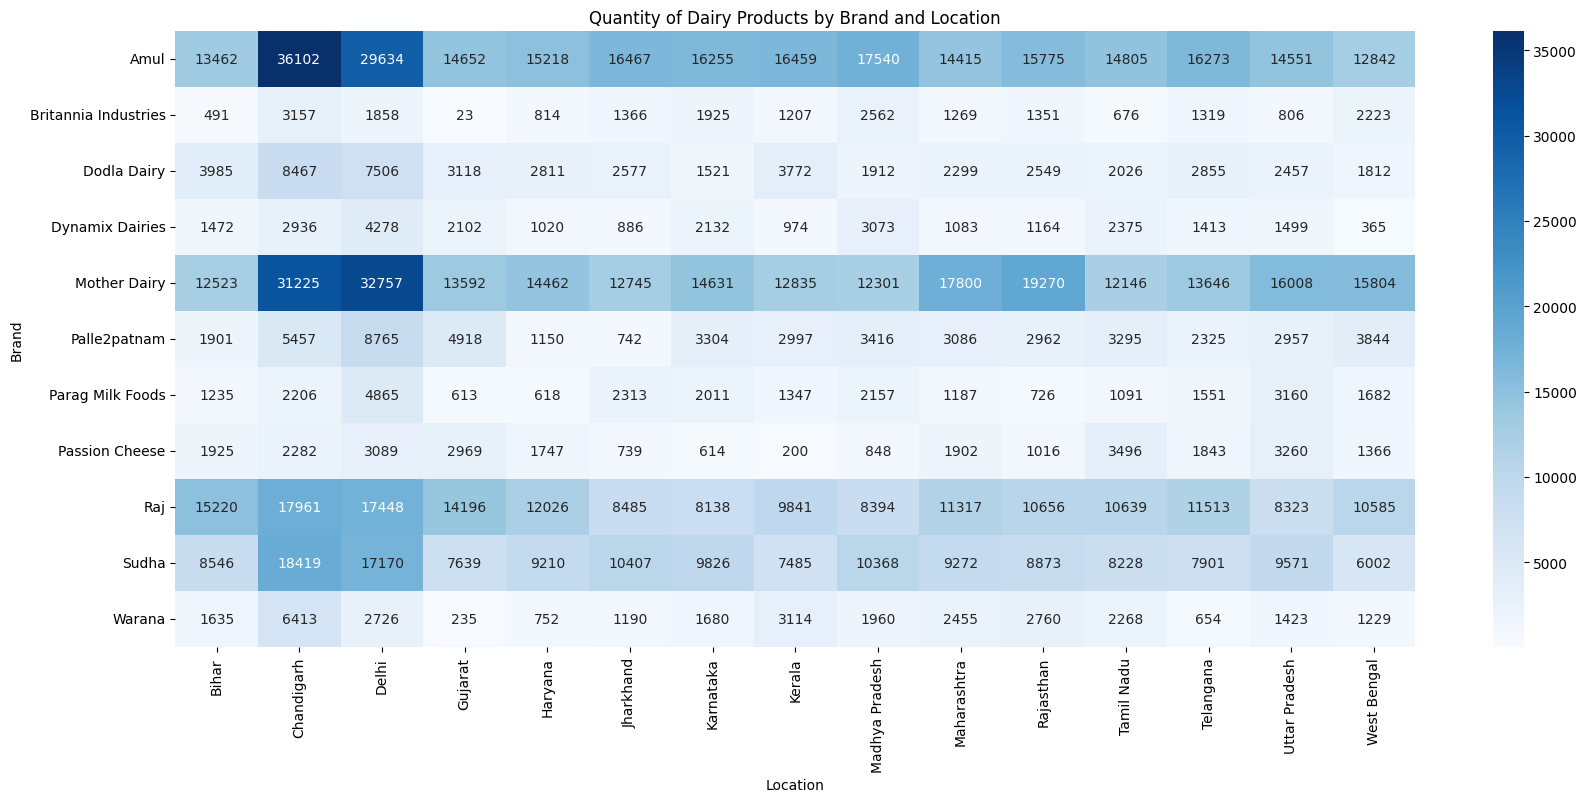

In [7]:
brand_customer_matrix = df.pivot_table(values='Quantity Sold (liters/kg)', index='Brand', columns='Location', aggfunc='sum')
plt.figure(figsize=(20, 8))
sns.heatmap(brand_customer_matrix, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Location')
plt.ylabel('Brand')
plt.title('Quantity of Dairy Products by Brand and Location');

**From the heatmap, we can observe the following:**

**Amul** is Clearly the leading brand in most locations, especially Bihar, Chandigarh, Jharkhand, and Karnataka.

**Mother Dairy** has a Strong presence in Delhi, Haryana, and Uttar Pradesh.

**Sudha** is Dominant in Kerala and West Bengal.

**Raj** shows Notable sales in Tamil Nadu and Telangana.

In [8]:
brand_customer_matrix

Location              Bihar  Chandigarh  Delhi  Gujarat  Haryana  Jharkhand  \
Brand                                                                         
Amul                  13462       36102  29634    14652    15218      16467   
Britannia Industries    491        3157   1858       23      814       1366   
Dodla Dairy            3985        8467   7506     3118     2811       2577   
Dynamix Dairies        1472        2936   4278     2102     1020        886   
Mother Dairy          12523       31225  32757    13592    14462      12745   
Palle2patnam           1901        5457   8765     4918     1150        742   
Parag Milk Foods       1235        2206   4865      613      618       2313   
Passion Cheese         1925        2282   3089     2969     1747        739   
Raj                   15220       17961  17448    14196    12026       8485   
Sudha                  8546       18419  17170     7639     9210      10407   
Warana                 1635        6413   2726      235      752       1190   

Location              Karnataka  Kerala  Madhya Pradesh  Maharashtra  \
Brand                                                                  
Amul                      16255   16459           17540        14415   
Britannia Industries       1925    1207            2562         1269   
Dodla Dairy                1521    3772            1912         2299   
Dynamix Dairies            2132     974            3073         1083   
Mother Dairy              14631   12835           12301        17800   
Palle2patnam               3304    2997            3416         3086   
Parag Milk Foods           2011    1347            2157         1187   
Passion Cheese              614     200             848         1902   
Raj                        8138    9841            8394        11317   
Sudha                      9826    7485           10368         9272   
Warana                     1680    3114            1960         2455   

Location              Rajasthan  Tamil Nadu  Telangana  Uttar Pradesh  \
Brand                                                                   
Amul                      15775       14805      16273          14551   
Britannia Industries       1351         676       1319            806   
Dodla Dairy                2549        2026       2855           2457   
Dynamix Dairies            1164        2375       1413           1499   
Mother Dairy              19270       12146      13646          16008   
Palle2patnam               2962        3295       2325           2957   
Parag Milk Foods            726        1091       1551           3160   
Passion Cheese             1016        3496       1843           3260   
Raj                       10656       10639      11513           8323   
Sudha                      8873        8228       7901           9571   
Warana                     2760        2268        654           1423   

Location              West Bengal  
Brand                              
Amul                        12842  
Britannia Industries         2223  
Dodla Dairy                  1812  
Dynamix Dairies               365  
Mother Dairy                15804  
Palle2patnam                 3844  
Parag Milk Foods             1682  
Passion Cheese               1366  
Raj                         10585  
Sudha                        6002  
Warana                       1229

**Plotting a bar chart to visualize the total revenue by customer location.**

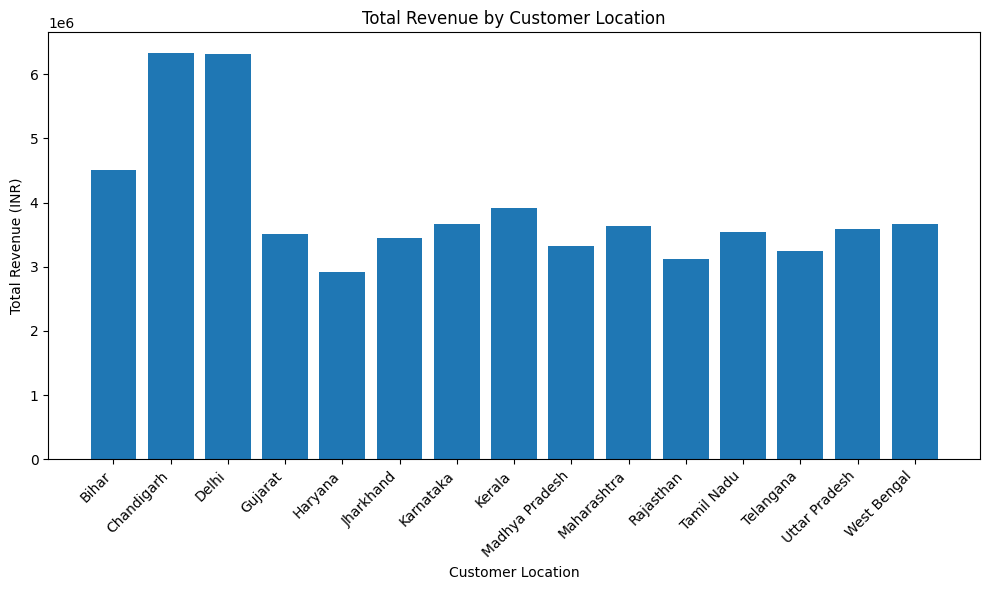

In [9]:
revenue_by_location = df.groupby('Customer Location')['Approx. Total Revenue(INR)'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(revenue_by_location['Customer Location'], revenue_by_location['Approx. Total Revenue(INR)'])
plt.xlabel('Customer Location')
plt.ylabel('Total Revenue (INR)')
plt.title('Total Revenue by Customer Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**From the bar chart, we can observe that:**

 Chandigarh and Delhi have the highest total revenue, followed by Bihar. There are significant regional differences in revenue generation

**Generating density plots to visualize the distribution of shelf life and total revenue.**


<ipython-input-10-0806fdda4816>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Shelf Life (days)'], shade=True)


Text(0.5, 1.0, 'Density Plot of Shelf Life')

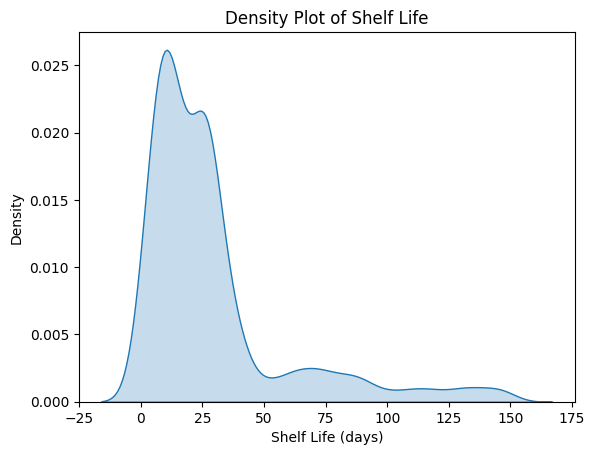

In [10]:
sns.kdeplot(df['Shelf Life (days)'], shade=True)
plt.xlabel('Shelf Life (days)')
plt.title('Density Plot of Shelf Life')

*The* distribution is **skewed to the right**, indicating that there are more data points with shorter shelf life compared to longer shelf life.

The peak of the distribution is around 25 days, suggesting that this is the most common shelf life for the products in the dataset.

There is a secondary peak around 150 days, indicating that there is a smaller group of products with a much longer shelf life.

<ipython-input-11-5e3b8791b8c9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Approx. Total Revenue(INR)'], shade=True)


Text(0.5, 1.0, 'Density Plot of Total Revenue')

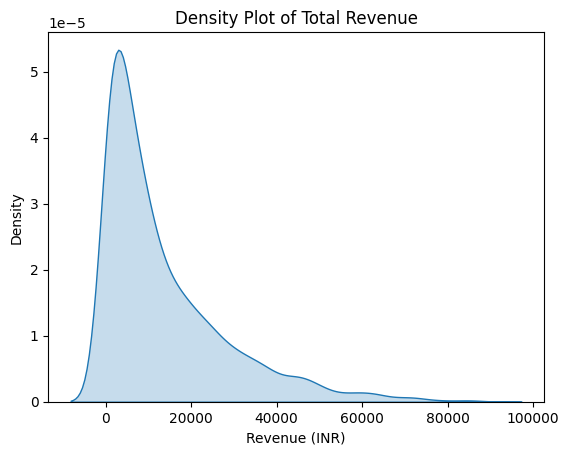

In [11]:
sns.kdeplot(df['Approx. Total Revenue(INR)'], shade=True)
plt.xlabel('Revenue (INR)')
plt.title('Density Plot of Total Revenue')

**Density Plot of Shelf Life:**  The peak of the distribution is around 50 days, suggesting that this is the most common shelf life for the products in the dataset.

**Density Plot of Total Revenue:** The peak of the distribution is around 20,000 INR, suggesting that this is the most common revenue range for the products.

Overall, both distributions show a right-skewed pattern, suggesting that there are some outliers in both shelf life and total revenue.

**Creating histograms with  kernel density estimates (KDE) to visualize the distribution of total land area, number of cows, quantity, and price per unit.**


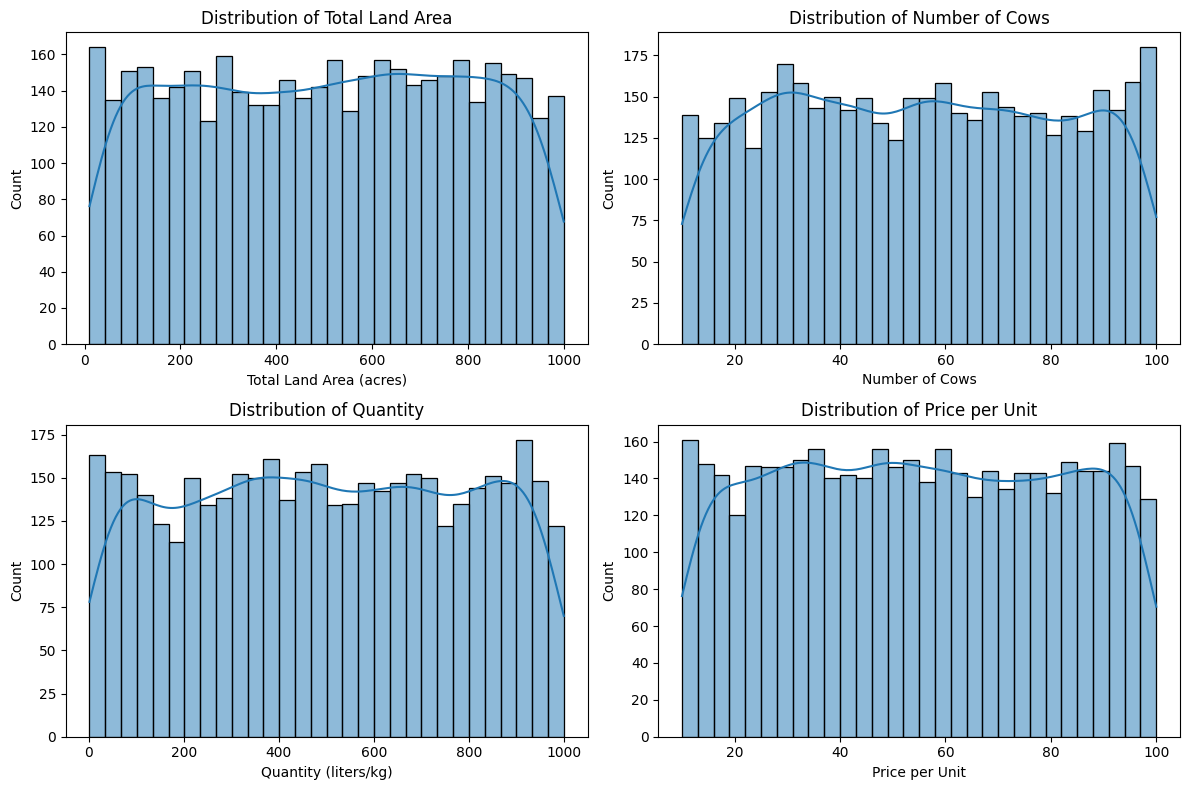

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Total Land Area (acres)'], bins=30, kde=True)
plt.title('Distribution of Total Land Area')

plt.subplot(2, 2, 2)
sns.histplot(df['Number of Cows'], bins=30, kde=True)
plt.title('Distribution of Number of Cows')

plt.subplot(2, 2, 3)
sns.histplot(df['Quantity (liters/kg)'], bins=30, kde=True)
plt.title('Distribution of Quantity')

plt.subplot(2, 2, 4)
sns.histplot(df['Price per Unit'], bins=30, kde=True)
plt.title('Distribution of Price per Unit')
plt.tight_layout()
plt.show()

Curd, Paneer, Lassi, Ghee, and Butter are generally more expensive than Ice Cream, Milk, Yogurt, and Cheese.

The prices for Buttermilk are relatively consistent.

There is some variation in prices within each product category, with a few outliers present.

**There are no significant spikes or anomalies, and the distributions appear to be well-balanced, though slight dips can be seen at the extremes in some cases. This suggests that the dataset has a diverse but consistent spread of values for each factor.**

**Plotting a box plot to visually compare the price distributions of different products, showing their ranges, medians, and outliers.**


Text(0.5, 1.0, 'Price per Unit by Product Name')

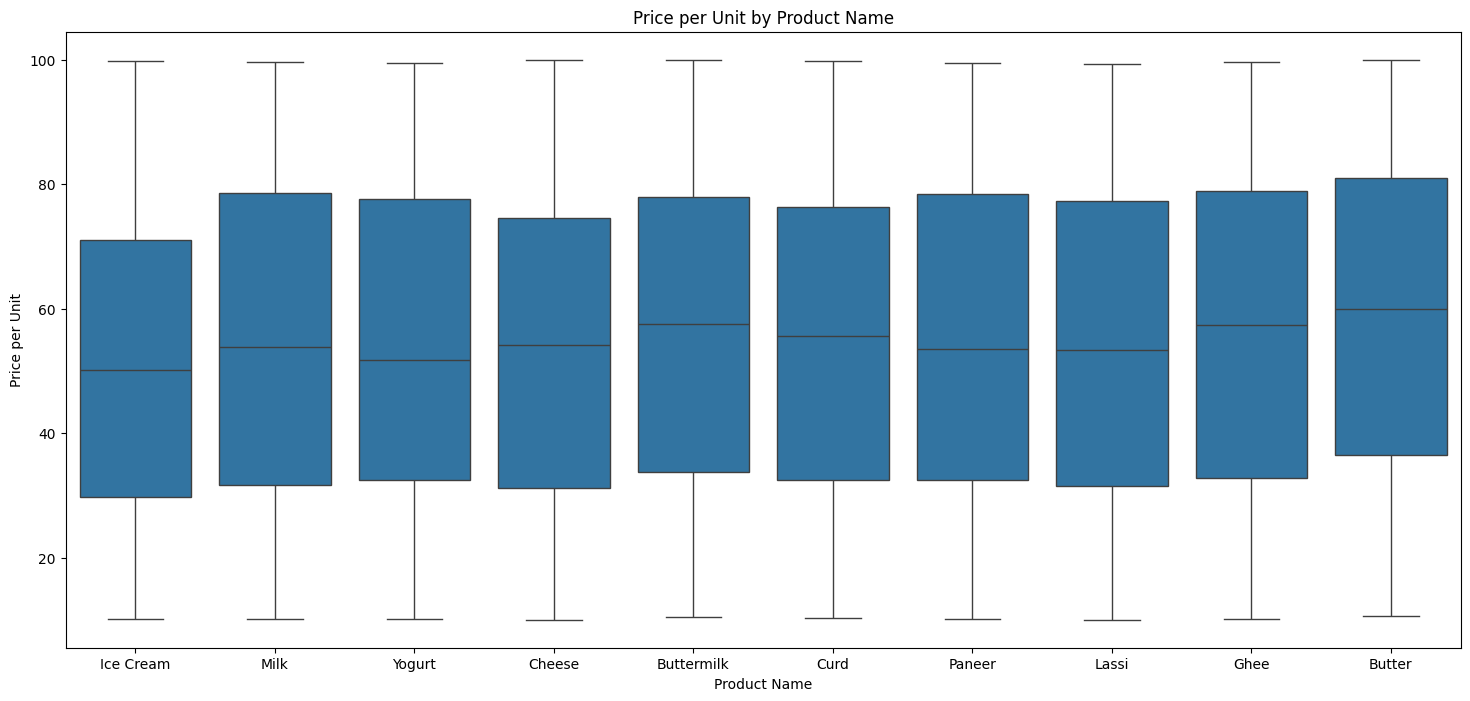

In [13]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Product Name', y='Price per Unit', data=df)
plt.title('Price per Unit by Product Name')

**Plotting a box plot that shows the distribution of total value for different dairy brands.**

Text(0.5, 1.0, 'Total Value by Brand')

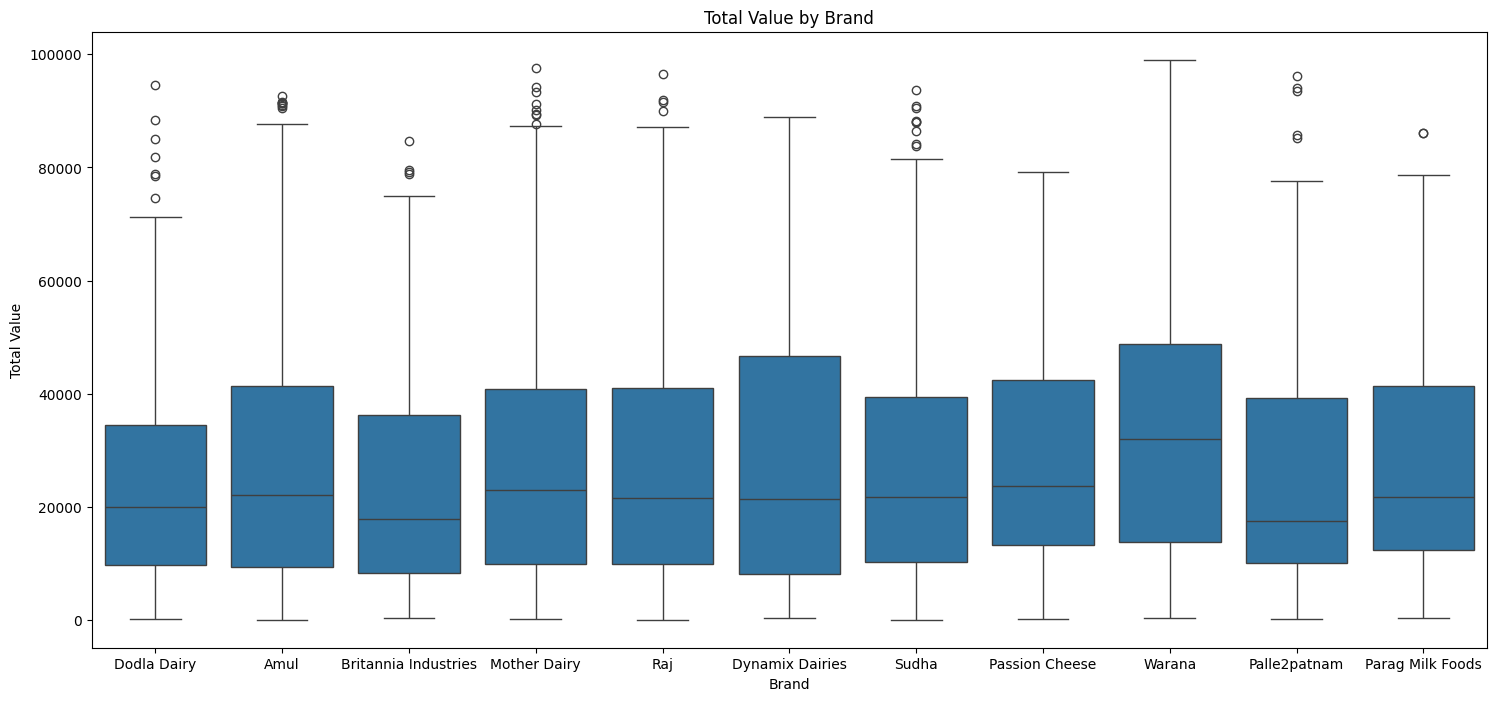

In [14]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Brand', y='Total Value', data=df)
plt.title('Total Value by Brand')

**From this Plot we can observe:** That there are outliers, indicating that some brands have a few products or regions with significantly higher or lower total values.


**Plotting a box plot to visually compare the quantity of items (in liters/kg) sold through different sales channels, showing their ranges, medians, and outliers.**

Text(0.5, 1.0, 'Quantity by Sales Channel')

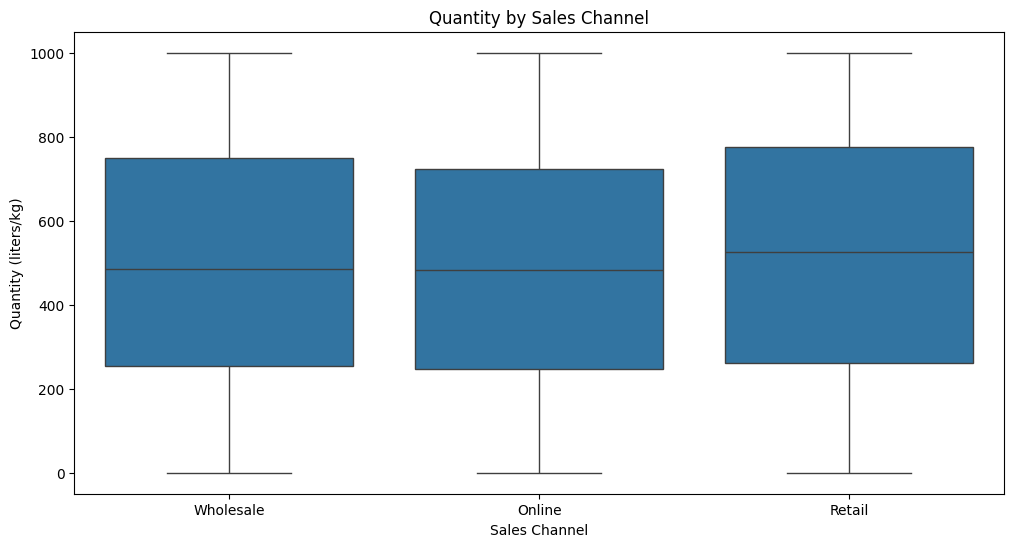

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales Channel', y='Quantity (liters/kg)', data=df)
plt.title('Quantity by Sales Channel')

**From this Plot we can Observe:**

The median quantity sold through all three channels is around 500 liters/kg, indicating a similar spread of quantities across each channel.

**Plotting a scatter plot to visualize the relationship between "Quantity (liters/kg)" and "Total Value,"**

highlighting how changes in quantity correlate with variations in total value.

Text(0.5, 1.0, 'Total Value vs. Quantity')

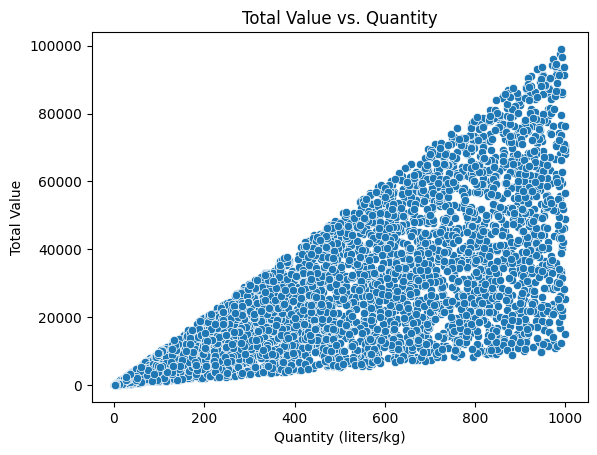

In [16]:
sns.scatterplot(x='Quantity (liters/kg)', y='Total Value', data=df)
plt.title('Total Value vs. Quantity')

The scatter plot suggests that there is a strong positive linear relationship between total value and quantity, indicating that higher quantities sold generally result in higher total values.

However, the plot also reveals a slight widening of the band at higher quantities. This could indicate that while the overall trend is linear, there might be a greater degree of variability in total value at higher quantities.

**Plotting a scatter plot to visualize the relationship between "Price per Unit" and "Total Value," illustrating how variations in unit price impact the total value.**

Text(0.5, 1.0, 'Total Value vs. Price per Unit')

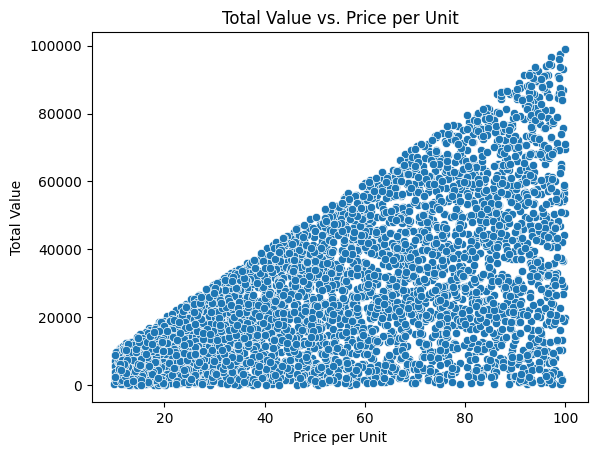

In [17]:
sns.scatterplot(x='Price per Unit', y='Total Value', data=df)
plt.title('Total Value vs. Price per Unit')

The scatter plot illustrates a strong positive linear relationship between total value and price per unit, suggesting that as the price per unit increases, so does the total value.

However, the plot also reveals a slight clustering of data points in the lower price per unit range, indicating that a larger proportion of sales occur at lower prices.

This could be due to factors such as pricing strategies, product differentiation, or consumer preferences.

**Plotting a pie chart to show the distribution of sales channels, illustrating the proportion of each channel in the dataset with percentage labels.**

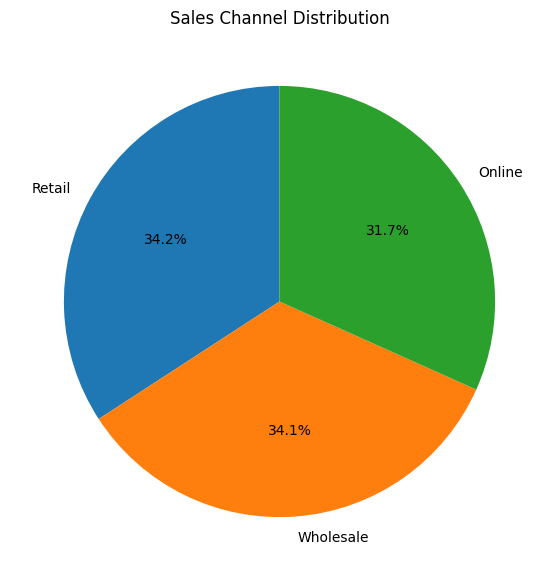

In [18]:
fig = plt.figure(figsize=(10, 7))
df['Sales Channel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sales Channel Distribution')
plt.ylabel('')
plt.show()

**Plotting a heatmap to visualize the total quantity sold by month and day of the week, showing the intensity of sales with color gradients and annotated values.**

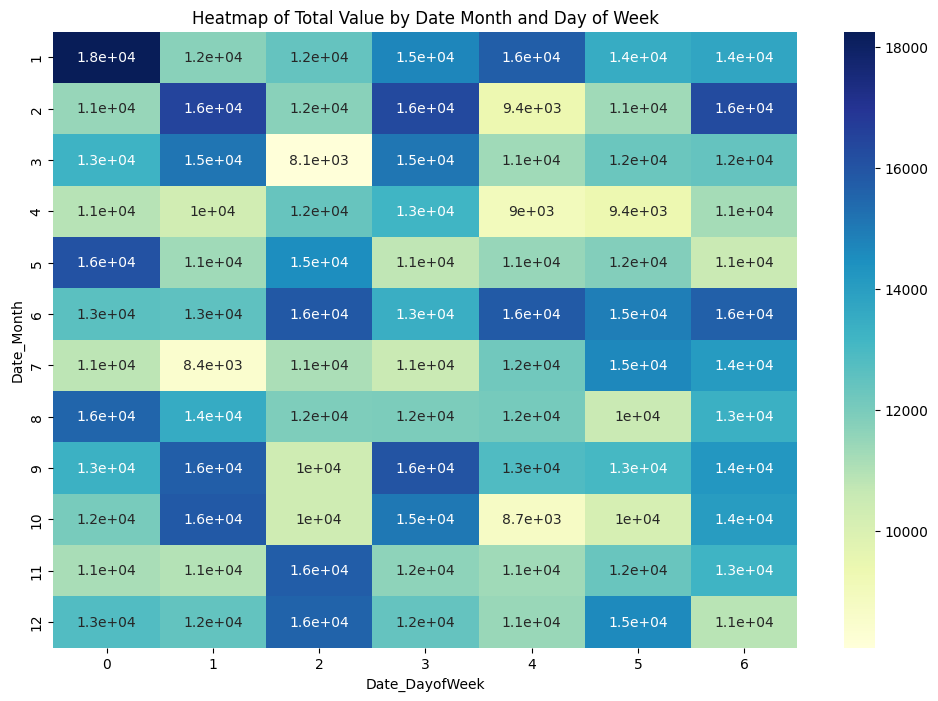

In [19]:
plt.figure(figsize=(12, 8))
heatmap_data = df.groupby(['Date_Month', 'Date_DayofWeek'])['Quantity Sold (liters/kg)'].sum().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Total Value by Date Month and Day of Week')
plt.show()

The cell corresponding to Month 10 and Day of Week 4 (Thursday) seems to be a potential outlier as it's significantly lighter than its surrounding cells. This might indicate a lower-than-expected total value for that specific combination.

We observe higher total values on Mondays in January.

**Creating a FacetGrid to display scatter plots of "Price per Unit" versus "Quantity Sold (liters/kg)" for each brand, with different colors representing sales channels, and including a legend for clarity.**

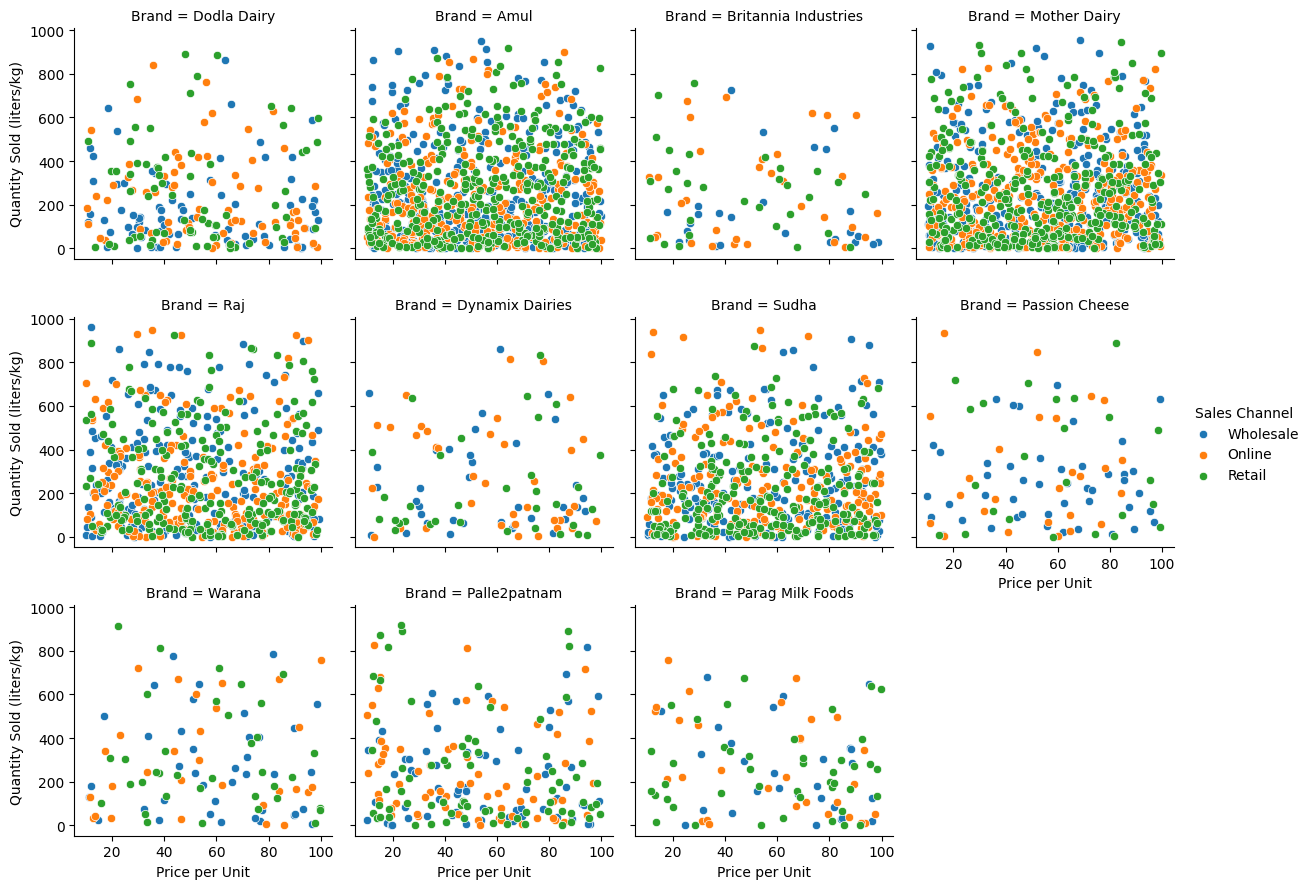

In [20]:
g = sns.FacetGrid(df, col='Brand', hue='Sales Channel', col_wrap=4)
g.map(sns.scatterplot, 'Price per Unit', 'Quantity Sold (liters/kg)')
g.add_legend()
plt.show()

**Plotting a stacked bar chart to show the total value by brand and sales channel**

illustrating how the total value is distributed across different sales channels for each brand.

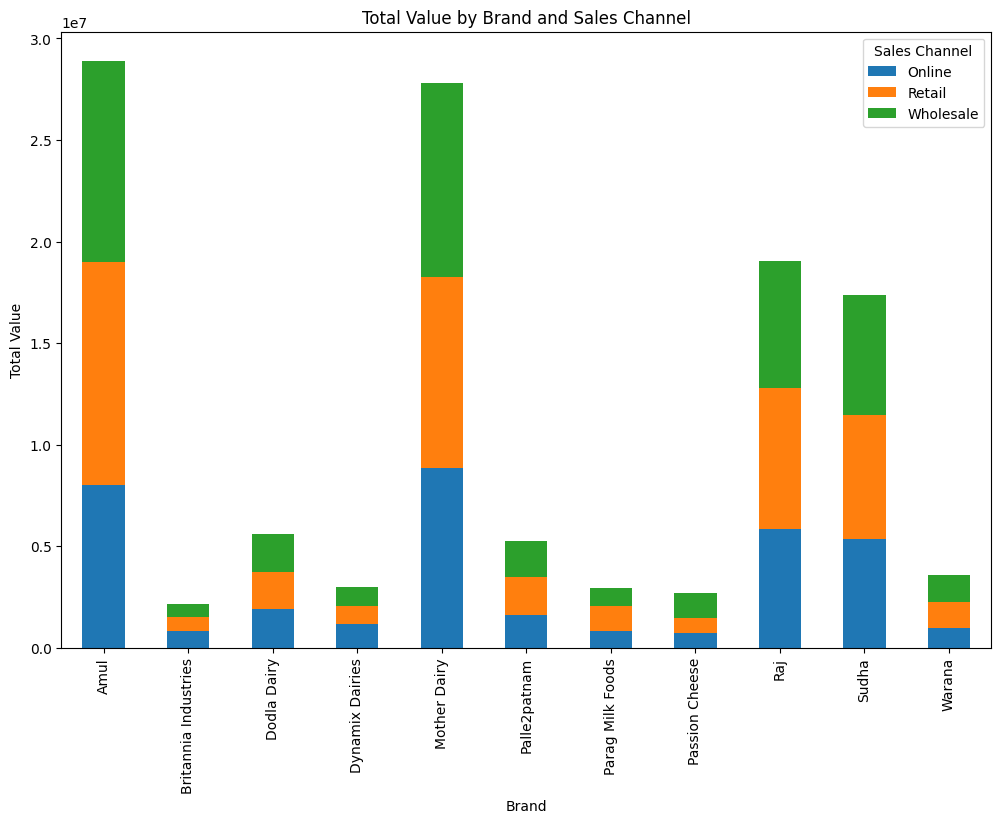

In [21]:
df.groupby(['Brand', 'Sales Channel'])['Total Value'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Value by Brand and Sales Channel')
plt.ylabel('Total Value')
plt.xlabel('Brand')
plt.show()

**Plotting a heatmap to display the count of products by brand and storage condition, with color gradients indicating the counts and annotations for clarity.**

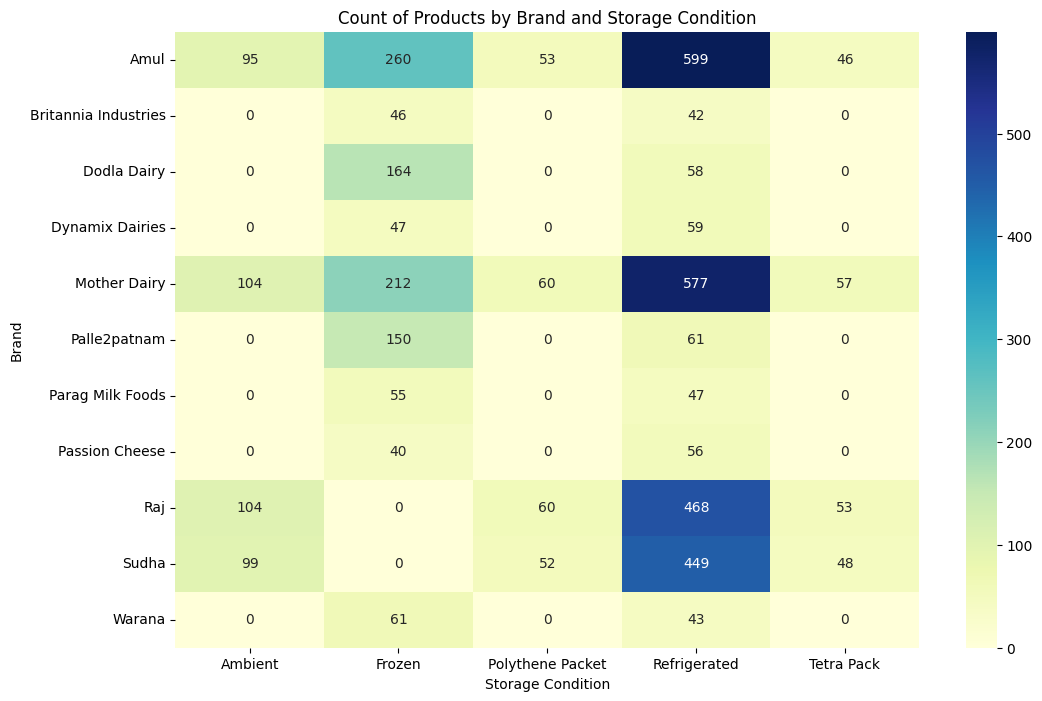

In [22]:
crosstab = pd.crosstab(df['Brand'], df['Storage Condition'])
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Count of Products by Brand and Storage Condition')
plt.xlabel('Storage Condition')
plt.ylabel('Brand')
plt.show()

Amul is focusing on two main categories: frozen and refrigerated products, similar to Mother Dairy.

The average price of ice cream has decreased drastically from the 6th month to the 7th month.

**Plotting line charts to show the average price per unit for each product across production months, with different lines representing each product and markers indicating monthly data points.**

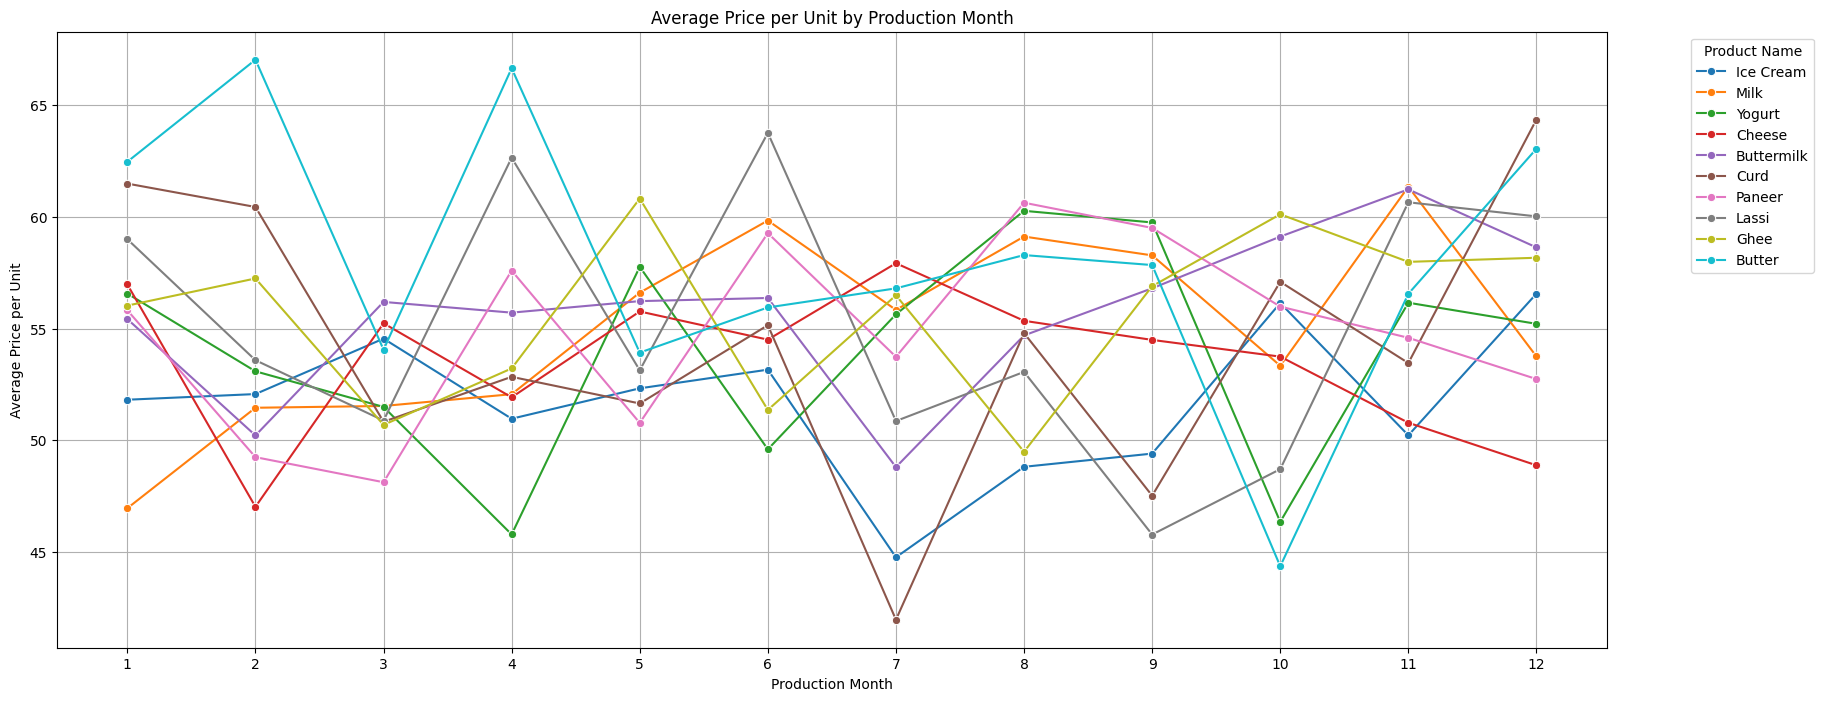

In [23]:
plt.figure(figsize=(20, 8))
for product_id in df['Product Name'].unique():
    product_df = df[df['Product Name'] == product_id]
    monthly_prices = product_df.groupby('Production_Month')['Price per Unit'].mean().reset_index()

    sns.lineplot(x='Production_Month', y='Price per Unit', data=monthly_prices, marker='o', label=product_id)

plt.title('Average Price per Unit by Production Month')
plt.xlabel('Production Month')
plt.ylabel('Average Price per Unit')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')

Price Fluctuations: Prices for most dairy products exhibit fluctuations throughout the year. There's no consistent upward or downward trend across all products.
Seasonal Variations: Some products seem to have more pronounced seasonal price variations than others. For instance, ice cream and buttermilk might have higher prices during warmer months, while certain types of cheese could have more stable prices throughout the year.

Milk and Yogurt: Prices for milk and yogurt appear to be relatively stable throughout the year, with minor fluctuations.
Ice Cream and Buttermilk: These products might have higher prices during warmer months (e.g., summer) due to increased demand and potential production costs.
Cheese: Prices for different types of cheese vary, with some showing more significant seasonal fluctuations than others.
Curd, Paneer, Lassi, Ghee, and Butter: These products also exhibit varying price trends, with some showing more pronounced seasonal patterns than others.

**Plotting a line chart to display the average price per unit by production month, showing how the average price varies across the months with data points marked for clarity.**

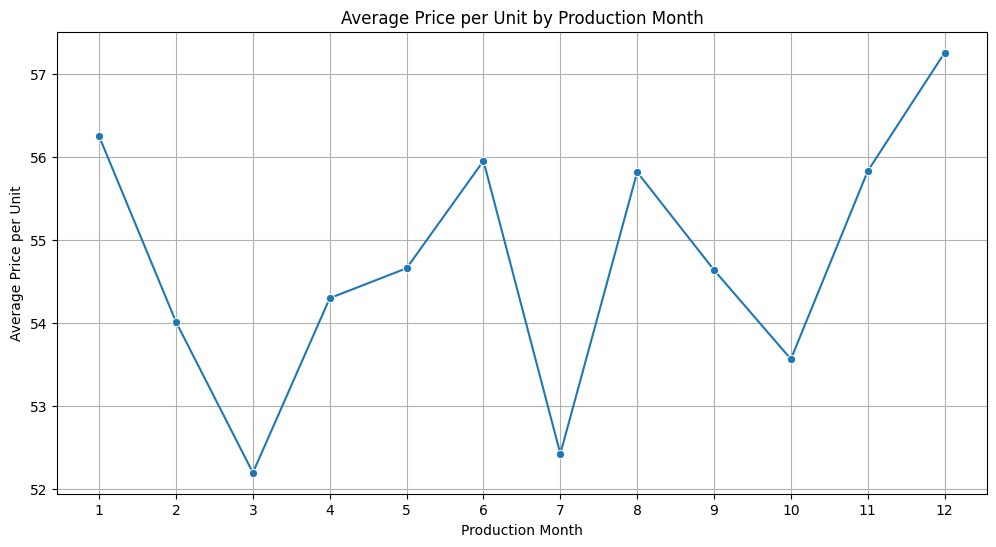

In [24]:
monthly_prices = df.groupby('Production_Month')['Price per Unit'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Production_Month', y='Price per Unit', data=monthly_prices, marker='o')
plt.title('Average Price per Unit by Production Month')
plt.xlabel('Production Month')
plt.ylabel('Average Price per Unit')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**Plotting a bar chart to show the average quantity sold (in liters/kg) by customer location, with bars representing the Average quantity sold at each location and x-axis labels rotated for readability.**

<ipython-input-25-c0d9392ed0ac>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Location', y='Quantity Sold (liters/kg)', data=df, estimator='mean', ci=None)


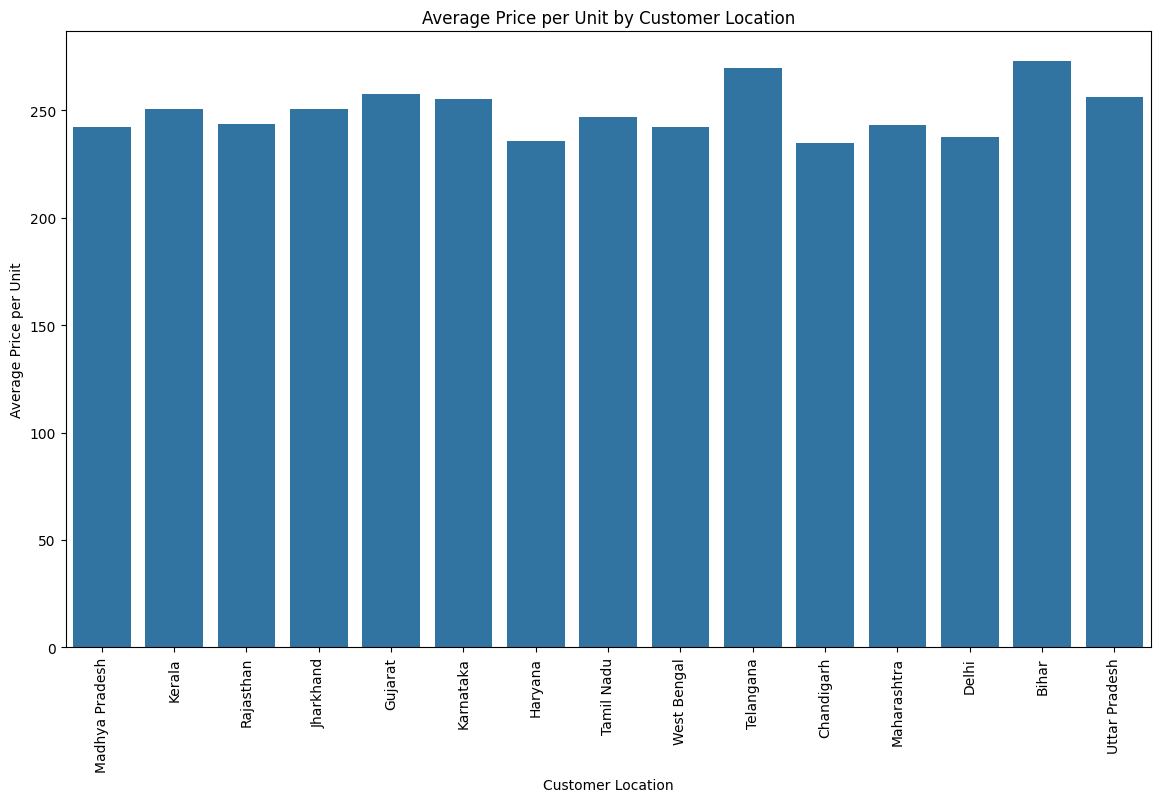

In [25]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Customer Location', y='Quantity Sold (liters/kg)', data=df, estimator='mean', ci=None)
plt.xticks(rotation=90)
plt.title('Average Price per Unit by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Average Price per Unit')
plt.show()

**Plotting a count plot to show the distribution of brands across different farm sizes, with bars representing the count of each brand per farm size, and using a legend and grid for better clarity and presentation.**

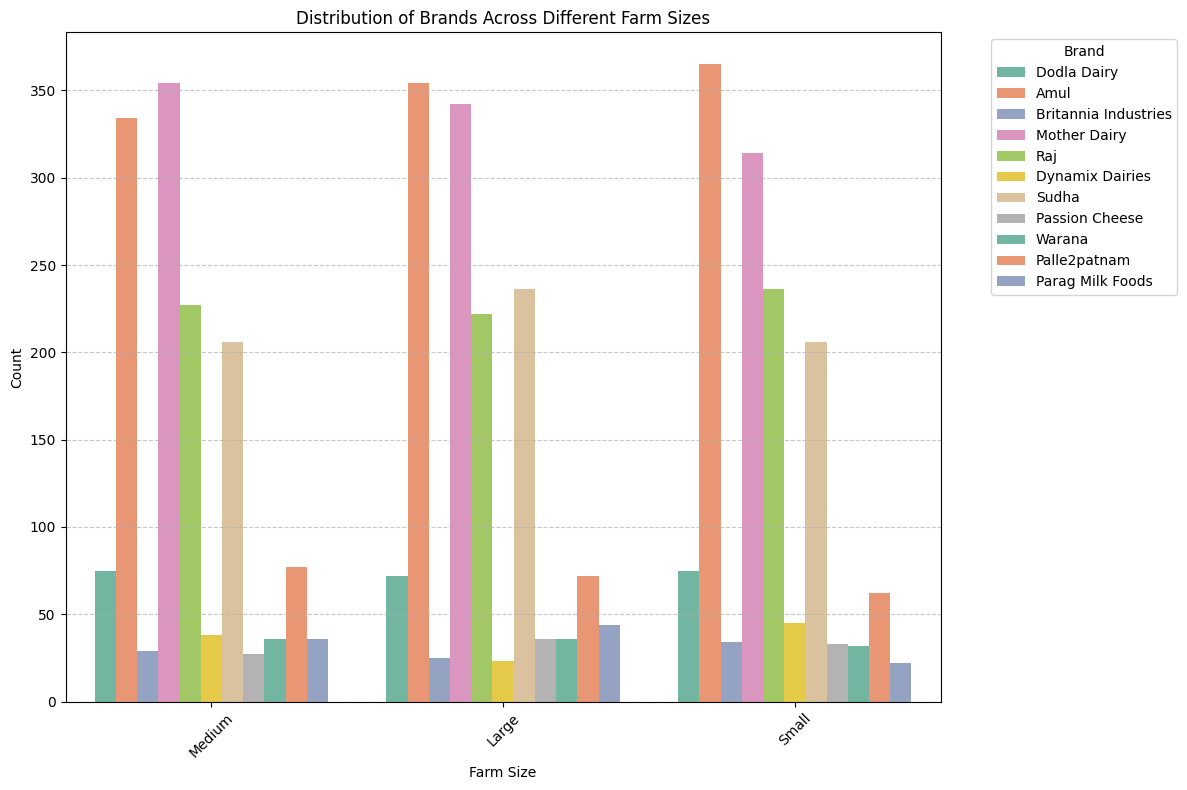

In [26]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Farm Size', hue='Brand', palette='Set2')
plt.xlabel('Farm Size')
plt.ylabel('Count')
plt.title('Distribution of Brands Across Different Farm Sizes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## **Data Preprocessing**

**Separating the dataset into feature columns and the target column, where `feature_column` contains all columns except those specified for dropping, and `target_column` is the column for "Approx. Total Revenue (INR)."**

In [27]:
columns_to_drop = ['Quantity Sold (liters/kg)', 'Quantity in Stock (liters/kg)','Price per Unit (sold)','Reorder Quantity (liters/kg)','Approx. Total Revenue(INR)']

In [28]:
feature_column = df.drop(columns=columns_to_drop,axis=1)
target_column = df['Approx. Total Revenue(INR)']

In [29]:
feature_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

**Splitting the dataset into training, validation, and test sets**

In [30]:
X_temp, X_test, y_temp, y_test = train_test_split(feature_column, target_column, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1/0.9, random_state=42)

**Data Preprocessing Pipeline:**
- Scaling numerical features.
- One-hot encoding categorical features.

Each step ensures that different types of data are properly transformed for model training.

In [31]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# **Initial Basic Modeling**

**Model Definitions and Hyperparameter Grids:**

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso' : Lasso(),
}
param_grids = {
    'Linear Regression': {'model__fit_intercept': [True, False]},
    'Ridge': {'model__alpha': [50.0]}, #Manually Searched
    'Lasso': {'model__alpha': [65.0]}, #Manually Searched
}

**Model Evaluation with Cross-Validation:**

Model evaluation using 10-fold outer cross-validation and 8-fold inner cross-validation for hyperparameter tuning.

It calculates various performance metrics including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), and Mean Absolute Error (MAE) for each model.

Results are aggregated and displayed, including best parameters, error scores, and mean metrics across folds.

In [33]:
# Define outer and inner cross-validation strategies
outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Outer loop for model evaluation
inner_kf = KFold(n_splits=8, shuffle=True, random_state=4)    # Inner loop for hyperparameter tuning

results = {}  # Dictionary to store results for each model

# Loop through the models dictionary, where each model is evaluated
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Lists to hold metrics across outer cross-validation splits
    outer_mse_scores, outer_r2_scores = [], []
    outer_mae_scores, outer_rmse_scores = [], []
    best_params_list = []  # To keep track of the best hyperparameters from GridSearchCV

    # Initialize lists for errors at different stages (train, validation, test)
    train_errors, validation_errors, test_errors = [], [], []

    # Get the parameter grid for the current model (if available)
    grid_params = param_grids.get(model_name, {})

    # Outer cross-validation loop
    for train_idx, val_idx in outer_kf.split(X_train):
        # Split the training data into outer train and validation sets
        X_outer_train, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_outer_train, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Create a pipeline with preprocessing steps and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Perform GridSearchCV for hyperparameter tuning on the inner cross-validation set
        grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_params, cv=inner_kf,
                                   scoring='neg_mean_squared_error')
        grid_search.fit(X_outer_train, y_outer_train)  # Fit on the outer training data

        # Get the best model from the grid search
        best_model = grid_search.best_estimator_
        best_params_list.append(grid_search.best_params_)  # Store best parameters for each fold

        # Make predictions on the outer training and validation data
        y_train_pred = best_model.predict(X_outer_train)
        y_val_pred = best_model.predict(X_val_fold)

        # Calculate errors for training and validation set
        train_error = mean_squared_error(y_outer_train, y_train_pred)
        validation_error = mean_squared_error(y_val_fold, y_val_pred)

        train_errors.append(train_error)  # Save train error
        validation_errors.append(validation_error)  # Save validation error

        # Compute evaluation metrics on validation set
        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        mae = mean_absolute_error(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)

        # Append the computed metrics to corresponding lists
        outer_mse_scores.append(mse)
        outer_r2_scores.append(r2)
        outer_mae_scores.append(mae)
        outer_rmse_scores.append(rmse)

    # After all outer CV folds, store the results for the current model
    results[model_name] = {
        'Best Parameters': best_params_list,
        'MSE': outer_mse_scores,
        'RMSE': outer_rmse_scores,
        'R2': outer_r2_scores,
        'MAE': outer_mae_scores,
        'Train Errors': train_errors,
        'Validation Errors': validation_errors,
        'Mean MSE': np.mean(outer_mse_scores),
        'Mean RMSE': np.mean(outer_rmse_scores),
        'Mean R2': np.mean(outer_r2_scores),
        'Mean MAE': np.mean(outer_mae_scores)
    }

# Print out the results for each model
for model_name, scores in results.items():
    print(f"\nModel: {model_name}")
    print("Best Parameters for each fold:", scores['Best Parameters'])
    print("MSE Scores:", scores['MSE'])
    print("RMSE Scores:", scores['RMSE'])
    print("R2 Scores:", scores['R2'])
    print("MAE Scores:", scores['MAE'])
    print("Validation Errors:", scores['Validation Errors'])
    print("Mean MSE:", scores['Mean MSE'])
    print("Mean RMSE:", scores['Mean RMSE'])
    print("Mean R2:", scores['Mean R2'])
    print("Mean MAE:", scores['Mean MAE'])

Evaluating model: Linear Regression
Evaluating model: Ridge
Evaluating model: Lasso

Model: Linear Regression
Best Parameters for each fold: [{'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': False}, {'model__fit_intercept': True}]
MSE Scores: [107820925.49693653, 125633116.23586822, 115950714.04489228, 89139888.08907926, 110598425.53352991, 89635181.34920272, 97707220.98972021, 103199142.8153638, 108284024.05623305, 98038755.51212545]
RMSE Scores: [10383.685544975662, 11208.617944950582, 10768.041328156773, 9441.392274928485, 10516.578603972392, 9467.58582476033, 9884.696302351438, 10158.697889757515, 10405.960986676486, 9901.45219208402]
R2 Scores: [0.5352079900353808, 0.3891108296527156, 0.5047404165123176, 0.554844031272564, 0.44696553223013846, 0.

**Plotting Train and Validation Errors:**

Generating line plots to visualize the training and validation errors for each model across different folds.

It helps in comparing how the errors change with each fold during cross-validation, providing insights into model performance and consistency.

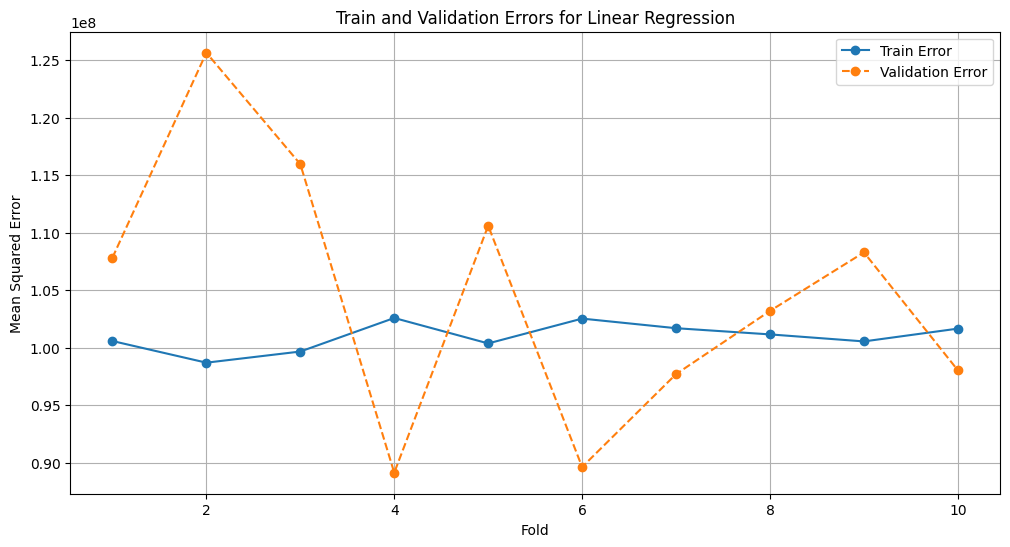

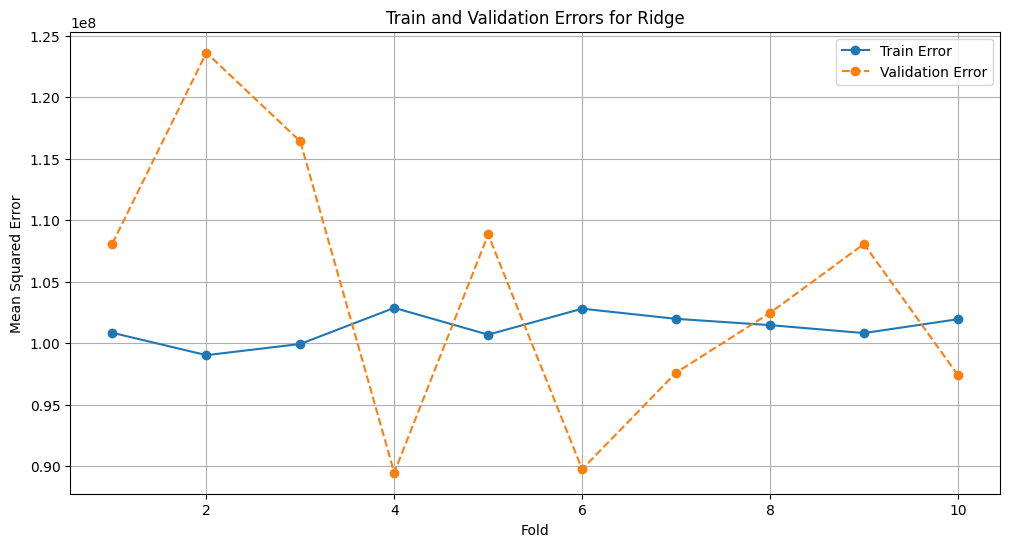

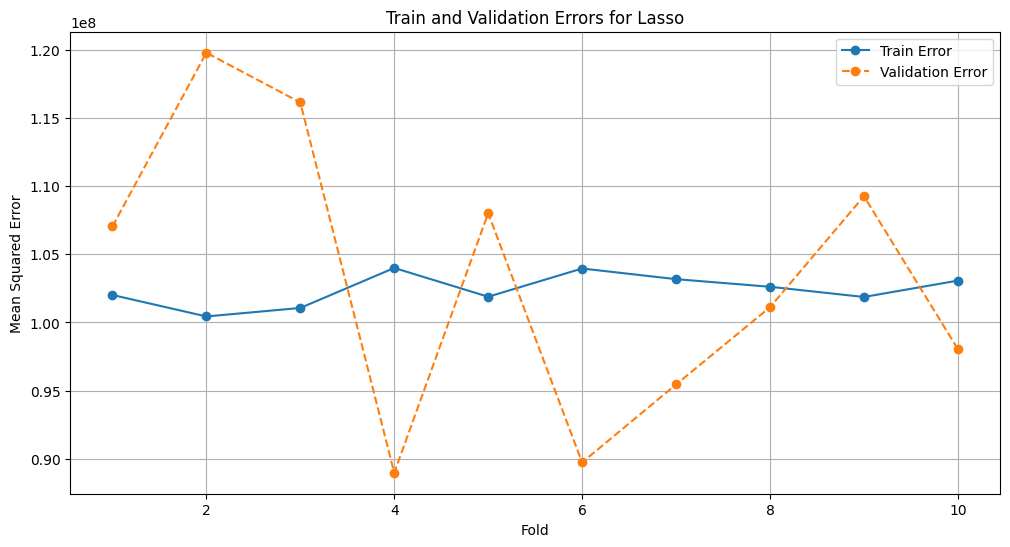

In [34]:
for model_name, metrics in results.items():
    folds = list(range(1, len(metrics['Train Errors']) + 1))
    plt.figure(figsize=(12, 6))
    plt.plot(folds, metrics['Train Errors'], marker='o', linestyle='-', label='Train Error')
    plt.plot(folds, metrics['Validation Errors'], marker='o', linestyle='--', label='Validation Error')
    plt.title(f'Train and Validation Errors for {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

Fold 2: The validation error is particularly high in this fold, suggesting that the model might be struggling to generalize well to the data in this specific fold.

Folds 4 and 10: The train and validation errors are relatively close in these folds, indicating that the model's performance is consistent on both training and validation data.

**Final Model Evaluation on Test Set:**

performing a final evaluation of each model on the test set. It fits the model using the full training data and computes the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), and Mean Absolute Error (MAE) on the test set.

This provides an assessment of the model’s performance on unseen data.

In [35]:
for model_name, model in models.items():
    print(f"\nFinal evaluation on test set for model: {model_name}")

    best_model_params = results[model_name]['Best Parameters'][-1]
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    pipeline.fit(X_train, y_train)

    y_test_pred = pipeline.predict(X_test)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test R2: {test_r2}")
    print(f"Test MAE: {test_mae}")


Final evaluation on test set for model: Linear Regression
Test MSE: 93146420.97294314
Test RMSE: 9651.239349065132
Test R2: 0.571683524408561
Test MAE: 6680.095831645645

Final evaluation on test set for model: Ridge
Test MSE: 93120531.03609042
Test RMSE: 9649.897980605308
Test R2: 0.5718025744631977
Test MAE: 6678.227845967168

Final evaluation on test set for model: Lasso
Test MSE: 93059695.36521499
Test RMSE: 9646.745324989926
Test R2: 0.5720823159698217
Test MAE: 6672.101230841333


**Feature Importance Analysis:**

Calculates and displays feature importance for each model using permutation importance, highlighting the impact of each feature on model performance.

In [36]:
for model_name, model in models.items():
    print(f"\nFeature Importance for model: {model_name}")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    result = permutation_importance(
        pipeline, X_train, y_train, n_repeats=10, random_state=42
    )

    importances = result.importances_mean
    std = result.importances_std

    feature_importance_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": importances, "Std": std}
    )

    feature_importance_df = feature_importance_df.sort_values(
        by="Importance", ascending=False
    )

    print(feature_importance_df)


Feature Importance for model: Linear Regression
                                Feature  Importance       Std
10                          Total Value    0.977313  0.022100
11                    Shelf Life (days)    0.010398  0.002294
7                                 Brand    0.004714  0.000947
15                    Customer Location    0.004140  0.000924
0                              Location    0.004137  0.001056
6                          Product Name    0.003822  0.001209
12                    Storage Condition    0.003100  0.001128
9                        Price per Unit    0.001544  0.000619
1               Total Land Area (acres)    0.000690  0.000428
3                             Farm Size    0.000333  0.000358
8                  Quantity (liters/kg)    0.000215  0.000195
5                            Product ID    0.000175  0.000247
17  Minimum Stock Threshold (liters/kg)    0.000162  0.000101
16                        Sales Channel    0.000149  0.000182
2                    



*   ***Total Value*** is the most important feature by far, contributing about 97% to predictions across all models. It's the main driver of the target variable.
*   ***Shelf Life and Brand*** have moderate importance, indicating some influence, but their impact is far smaller compared to Total Value.
*   ***Location and Customer Location*** also play a minor role, with some contribution to the model's performance.
*   Many features like ***Expiration Date, Production Date, and Date-related*** attributes have zero importance, meaning they don't affect predictions and could be removed to simplify the model.

*Lasso* tends to push less important features (like Storage Condition) closer to zero, while *Ridge* distributes importance more evenly.





**Data Transformations:**

1. **Season Mapping:** Categorizes months into seasons.
2. **Average Values:** Calculates mean price and quantity per product.
3. **Date Differences:** Computes days until expiration and days since production.
4. **Price and Stock Analysis:** Determines price difference and encodes categorical variables.

# **Feature Engineering**

In [37]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    return 'Unknown'
df['Season'] = df['Date_Month'].apply(get_season)

In [38]:
df['Avg Unit Price'] = df.groupby('Product ID')['Price per Unit'].transform('mean')
df['Avg Quantity'] = df.groupby('Product ID')['Quantity (liters/kg)'].transform('mean')

In [39]:
df['Days Until Expiration'] = (pd.to_datetime(df['Expiration Date']) - pd.to_datetime(df['Date'])).dt.days

In [40]:
df['Days Since Production'] = (pd.to_datetime(df['Date']) - pd.to_datetime(df['Production Date'])).dt.days

In [41]:
df['Shelf Life Remaining'] = df['Shelf Life (days)'] - df['Days Since Production']

In [42]:
df['Price Difference'] = df['Price per Unit'] - df['Price per Unit (sold)']
df['Price Difference Mean'] = df.groupby('Product ID')['Price Difference'].transform('mean')

In [43]:
df['Sales Channel Encoding'] = df['Sales Channel'].astype('category').cat.codes

In [44]:
df['Customer Location Encoding'] = df['Customer Location'].astype('category').cat.codes

In [45]:
df['Avg Price per Unit by Brand'] = df.groupby('Brand')['Price per Unit'].transform('mean')

In [46]:
df['Consumption Value'] = df['Quantity (liters/kg)'] - df['Quantity in Stock (liters/kg)']

**Generates descriptive statistics and a histogram for the "Consumption Value" column to visualize its distribution and frequency.**

count    4325.000000
mean      248.583986
std       217.023620
min         1.030000
25%        69.400000
50%       189.630000
75%       374.380000
max       960.380000
Name: Consumption Value, dtype: float64


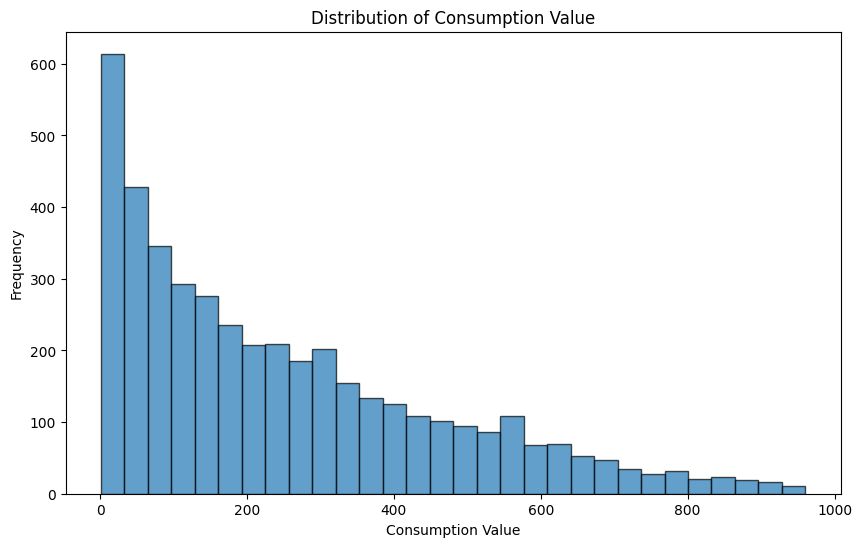

In [47]:
print(df['Consumption Value'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df['Consumption Value'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Consumption Value')
plt.ylabel('Frequency')
plt.title('Distribution of Consumption Value')
plt.show()

**The histogram reveals the following about consumption value:**

- **Skewness:** Right-skewed, with a few high values.
- **Peak:** Most common values are between 0 and 100.

In summary, most values are low, with a few high outliers possibly indicating a small number of high-consuming individuals.

In [48]:
average_sold = df['Quantity Sold (liters/kg)'].mean()
df['Category'] = pd.cut(
    df['Consumption Value'],
    bins=[-float('inf'), 0, average_sold, float('inf')],
    labels=[0, 1, 2]
).astype(int)

In [49]:
df['Avg Reorder Qunatity by Brand'] = df.groupby('Brand')['Reorder Quantity (liters/kg)'].transform('mean')
df['Avg Reorder Qunatity by Product'] = df.groupby('Product ID')['Reorder Quantity (liters/kg)'].transform('mean')

In [50]:
print(df.isna().sum())

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
Production_Month                       0
Production_Year 

In [51]:
df.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)', 'Production_Month', 'Production_Year',
       'Production_DayofWeek', 'Expiration_Month', 'Expiration_Year',
       'Expiration_DayofWeek', 'Date_Month', 'Date_Year', 'Date_DayofWeek',
       'Season', 'Avg Unit Price', 'Avg Quantity', 'Days Until Expiration',
       'Days Since Production', 'Shelf Life Remaining', 'Price Difference',
       'Price Difference Mean', 'Sales Channel Encoding',
       'Customer Location Encoding', 'Avg Price per Unit by Brand',
 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

**Correlation Matrix**

The heatmap displays the correlation between numerical variables, with color intensity indicating the strength of the relationships.

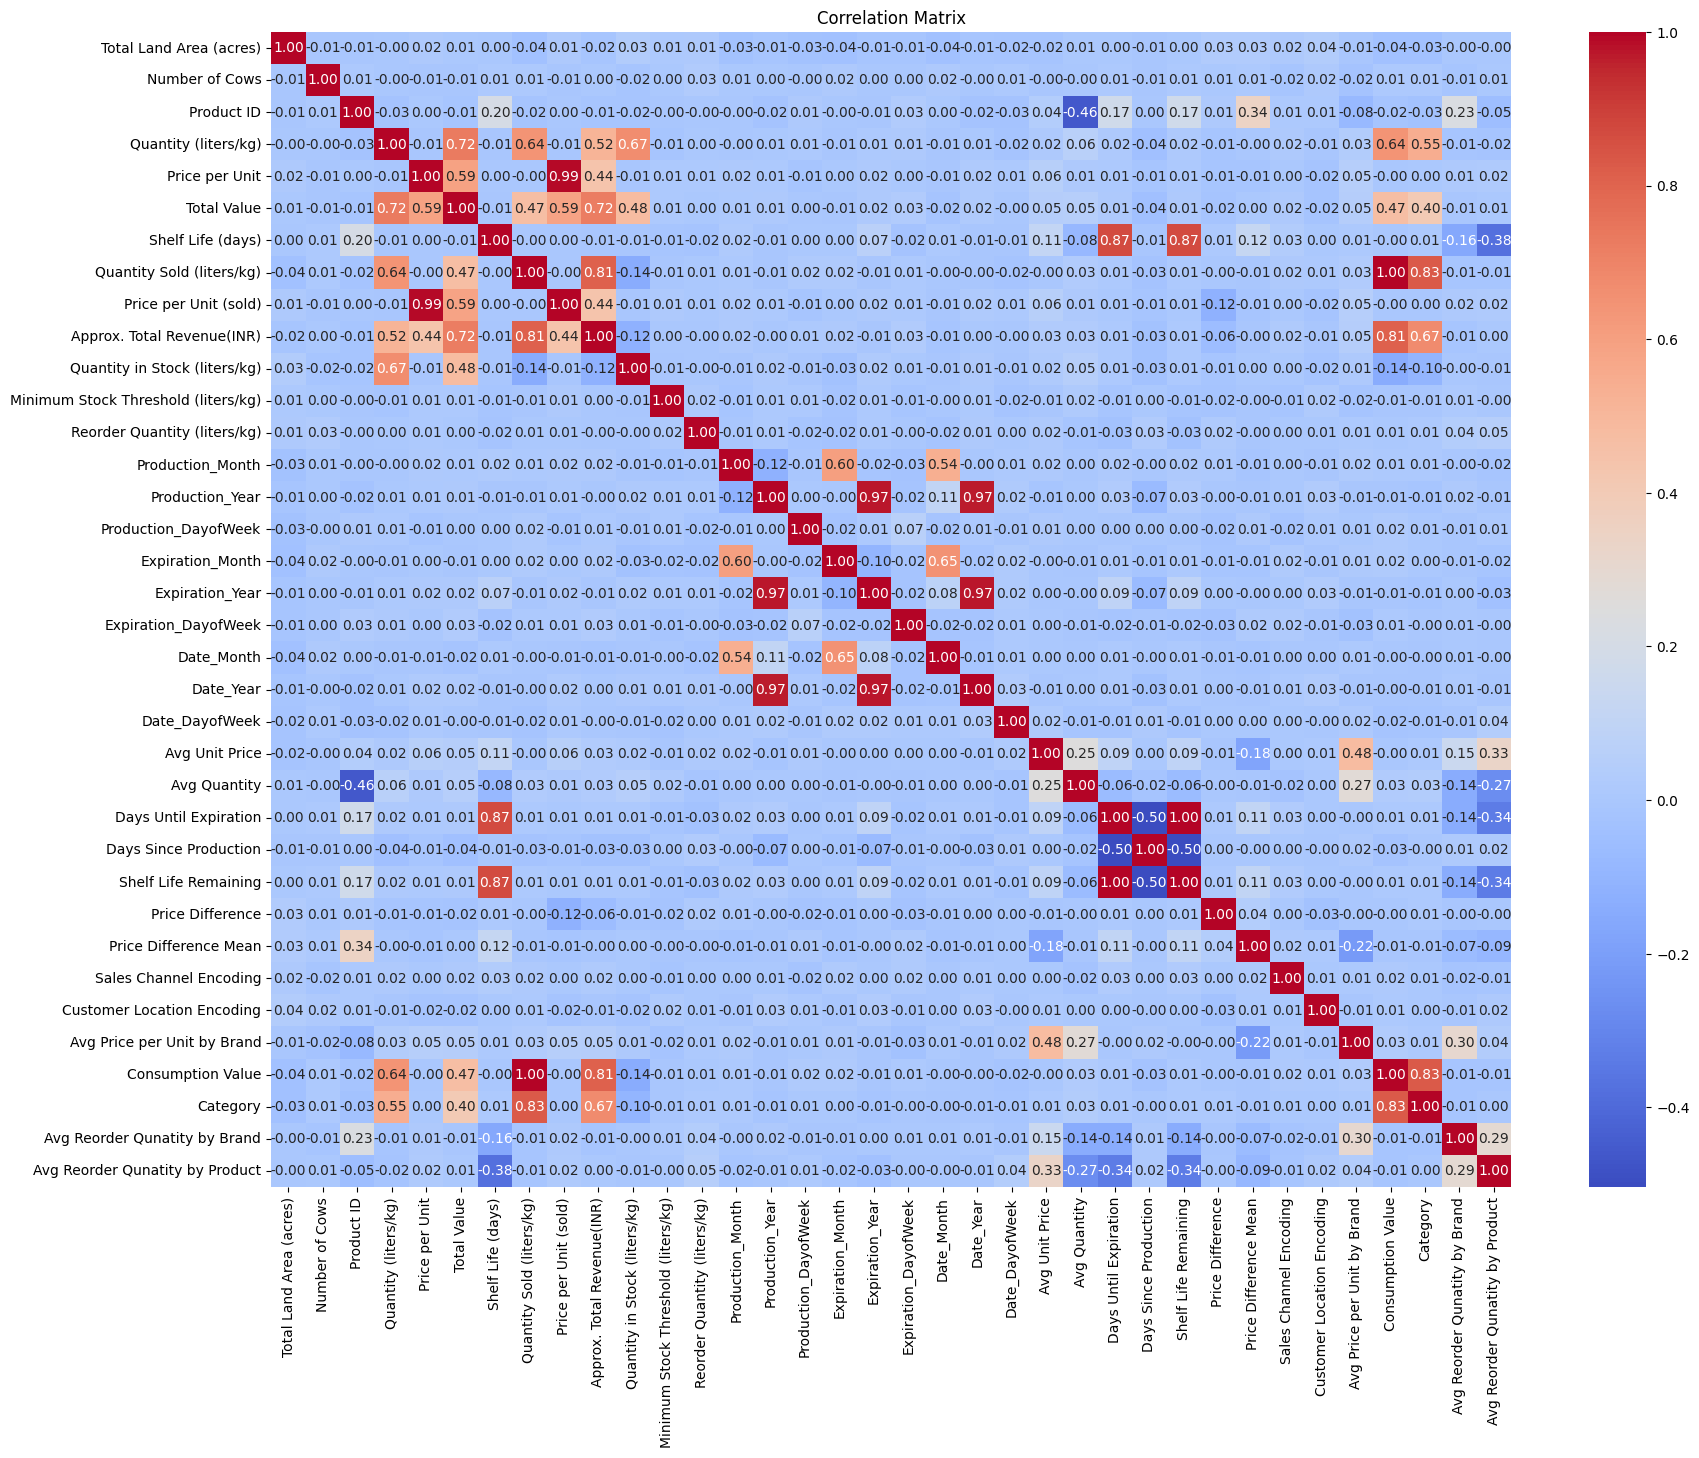

In [53]:
numerical_df = df.select_dtypes(include=np.number)

corr_matrix = numerical_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Customer Segmentation**

The scatter plot visualizes customer segments based on `Quantity Sold` and `Approx. Total Revenue`, with distinct clusters indicating different customer groups.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


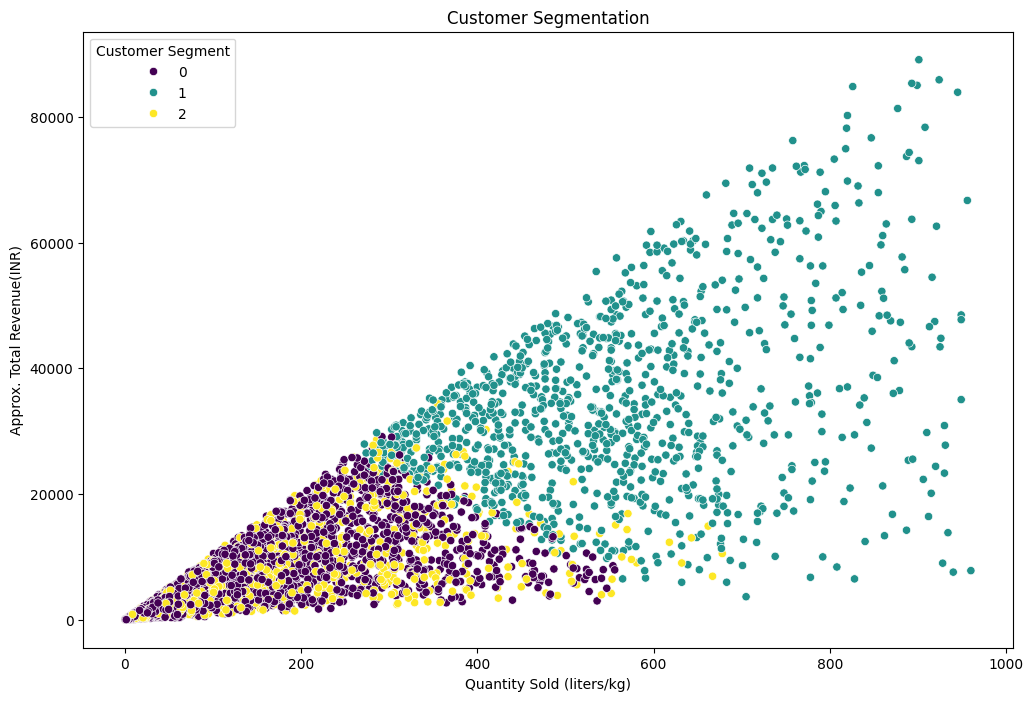

In [54]:
features = df[['Quantity Sold (liters/kg)', 'Approx. Total Revenue(INR)', 'Avg Unit Price']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)
df['Customer Segment'] = kmeans.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Quantity Sold (liters/kg)', y='Approx. Total Revenue(INR)', hue='Customer Segment', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

The `Customer Segment` column is removed from the DataFrame because it was used for customer segmentation analysis and is no longer needed for the current analysis or visualization. This step helps in keeping the dataset clean and relevant by retaining only the necessary features.

In [55]:
df = df.drop(columns=['Customer Segment'],axis=1)

The boxplot shows how Approx. Total Revenue(INR) varies across different Sales Channel categories, highlighting differences in median revenue, spread, and the presence of outliers.

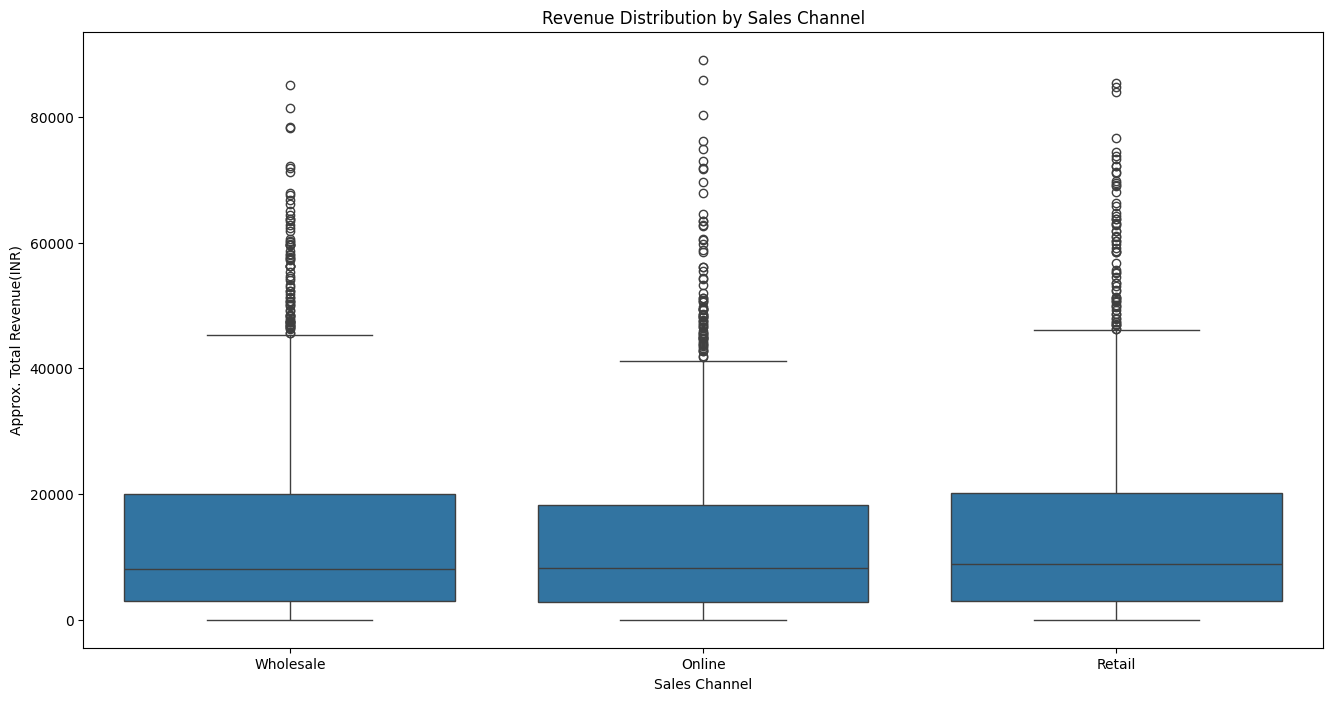

In [56]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Sales Channel', y='Approx. Total Revenue(INR)', data=df)
plt.title('Revenue Distribution by Sales Channel')
plt.show()

**The interactive scatter plot visualizes the relationship between `Price per Unit (sold)` and `Approx. Total Revenue(INR)`, with points sized by `Quantity Sold (liters/kg)` and colored by `Brand`. Hovering over points reveals the `Customer Location`.**

In [57]:
fig = px.scatter(df, x='Price per Unit (sold)', y='Approx. Total Revenue(INR)', color='Brand', size='Quantity Sold (liters/kg)', hover_name='Customer Location')
fig.update_layout(title='Interactive Scatter Plot')
fig.show()

**The stacked bar chart displays total revenue across different categories and sales channels, highlighting the contribution of each sales channel within each category.**

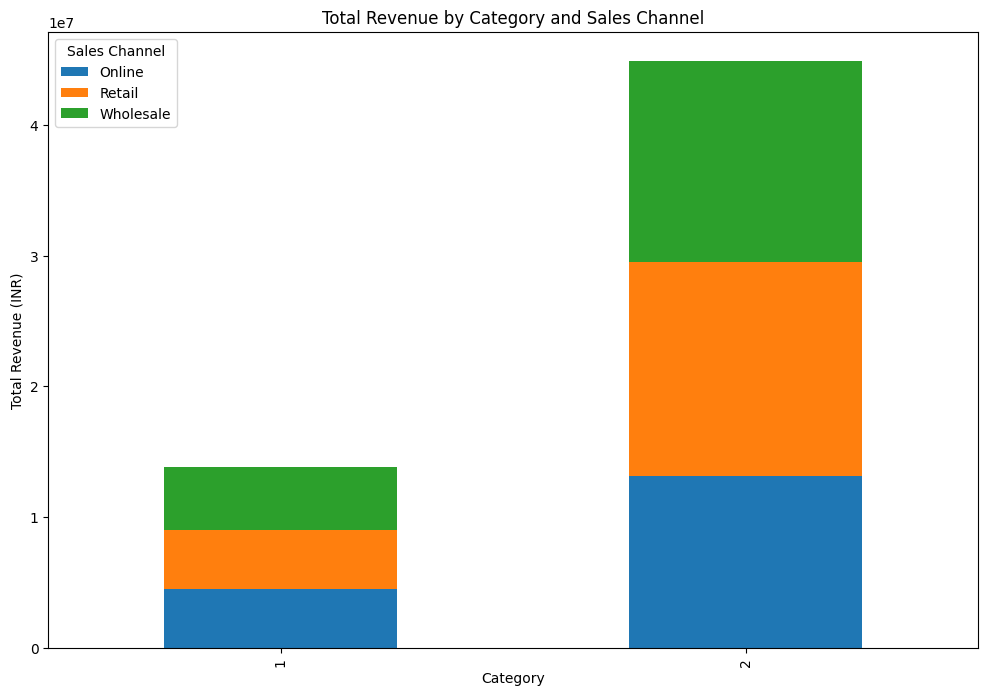

In [58]:
df.groupby(['Category', 'Sales Channel'])['Approx. Total Revenue(INR)'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Revenue by Category and Sales Channel')
plt.ylabel('Total Revenue (INR)')
plt.xlabel('Category')
plt.show()

Category 2 generates significantly more revenue than Category 1. Retail dominates both categories, while Online and Wholesale channels contribute less, especially in Category 1.

**The bar plot illustrates the distribution of each category across different seasons:**

- It shows how counts vary by season for each category.
- The stacked bars provide a clear comparison of category counts within each season.

<Figure size 1200x800 with 0 Axes>

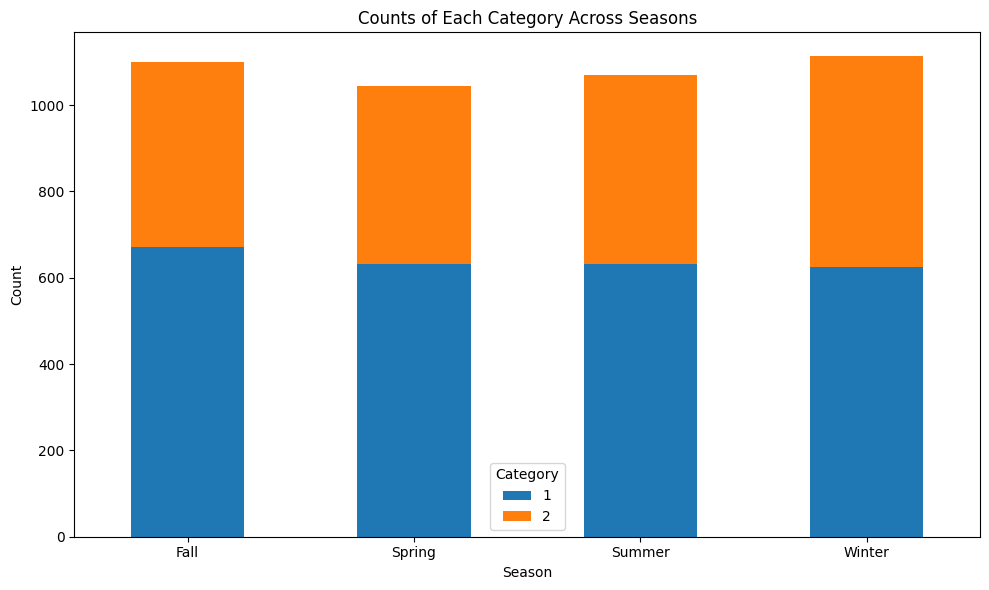

In [59]:
plt.figure(figsize=(12, 8))
result = df.groupby(['Season', 'Category']).size().reset_index(name='Count')
pivot_table = result.pivot(index='Season', columns='Category', values='Count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Counts of Each Category Across Seasons')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Plotting The line plot it shows the trend of category counts across seasons.**

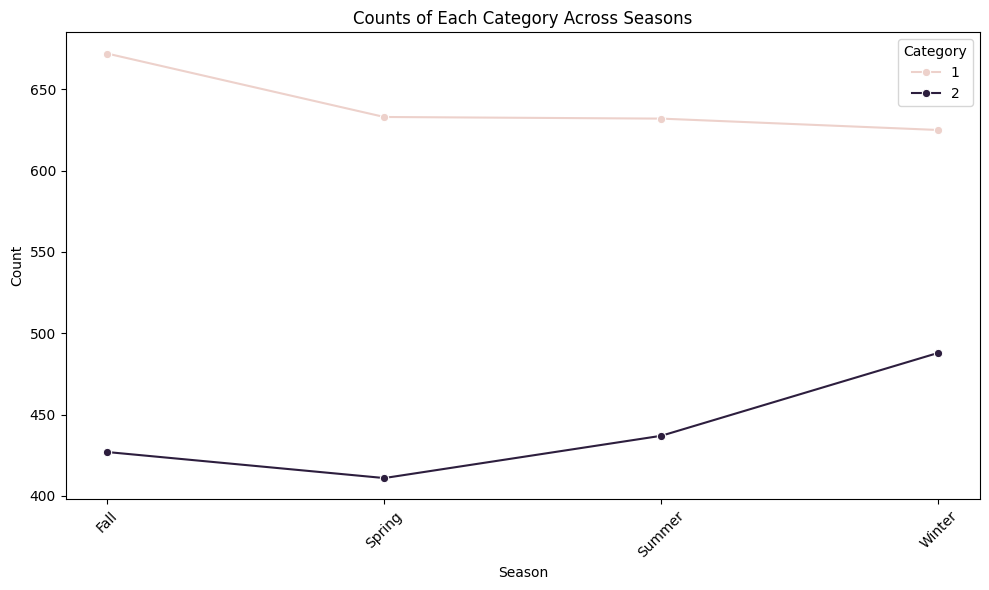

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=result, x='Season', y='Count', hue='Category', marker='o')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Counts of Each Category Across Seasons')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
result

Season  Category  Count
0    Fall         1    672
1    Fall         2    427
2  Spring         1    633
3  Spring         2    411
4  Summer         1    632
5  Summer         2    437
6  Winter         1    625
7  Winter         2    488

In [62]:
columns_to_drop = ['Quantity Sold (liters/kg)', 'Quantity in Stock (liters/kg)','Consumption Value','Price per Unit (sold)','Approx. Total Revenue(INR)','Reorder Quantity (liters/kg)']

In [63]:
feature_column = df.drop(columns=columns_to_drop,axis=1)
target_column = df['Approx. Total Revenue(INR)']

In [64]:
feature_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

**Converting categorical features to binary, removeing specific date columns, and scaleing the features for consistent data input.**

In [65]:
X = pd.get_dummies(feature_column, drop_first=True)
X.drop(['Date','Production Date', 'Expiration Date'], axis=1, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
X_scaled

array([[-0.67380805,  1.57176211, -0.17926771, ..., -0.56408835,
        -0.57298949,  1.69879192],
       [-1.69391283, -0.41992887, -1.58640539, ..., -0.56408835,
        -0.57298949,  1.69879192],
       [ 0.27354452, -1.18596386, -0.53105213, ..., -0.56408835,
        -0.57298949,  1.69879192],
       ...,
       [-0.67135966,  0.38440787,  0.17251671, ..., -0.56408835,
        -0.57298949,  1.69879192],
       [ 1.35384475,  1.34195162,  0.17251671, ..., -0.56408835,
        -0.57298949, -0.58865361],
       [-0.03715634,  0.11629562, -1.58640539, ..., -0.56408835,
        -0.57298949,  1.69879192]])

**Spliting the data into training and test sets, it trains a K-Nearest Neighbors regressor, makes predictions on the test set, and evaluates the model using Mean Squared Error (MSE) and R-squared metrics.**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_column, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 158734456.20384732
R-squared: 0.21428126979798567


splits the data into three sets: test set (10%), validation set (10% of the remaining 90%), and training set (remaining 80%).

In [68]:
X_temp, X_test, y_temp, y_test = train_test_split(feature_column, target_column, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1/0.9, random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(3459, 41)
(433, 41)
(3459,)
(433,)
(433, 41)
(433,)


**Preprocessing Pipeline:**
- **Date Features:** Transforms 'Production Date', 'Expiration Date', and 'Date' by extracting year, month, day, and weekday, then scales the features.
- **Numerical Features:** Scales all numerical features using `StandardScaler`.
- **Categorical Features:** Encodes categorical features with `OneHotEncoder`.


In [70]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# **Final Modeling**

**Model Setup:**


In [71]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso' : Lasso(),
    # 'Polynomial Regression': Pipeline([
    #     ('poly_features', PolynomialFeatures()),
    #     ('linear', LinearRegression())
    # ])
    # 'XGBoost': XGBRegressor()
}
param_grids = {
    'Linear Regression': {'model__fit_intercept': [True, False]},
    # 'Polynomial Regression': {
    #     'model__poly_features__degree': [2],
    #     'model__linear__fit_intercept': [True, False]
    # }
    'Ridge': {'model__alpha': [50.00]},#Manually Searched
    'Lasso': {'model__alpha': [65.00]},#Manually Searched
    # 'XGBoost': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 4, 5]}
}

**Model Evaluation Summary:**
- **K-Fold Cross-Validation:** Used 10 splits for outer loop and 8 for inner loop.
- **Metrics Calculated:** Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), Mean Absolute Error (MAE), with training, validation, and test errors recorded.


In [72]:
# Define outer and inner cross-validation strategies
outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Outer loop for model evaluation
inner_kf = KFold(n_splits=8, shuffle=True, random_state=4)    # Inner loop for hyperparameter tuning

results = {}  # Dictionary to store results for each model

# Loop through the models dictionary, where each model is evaluated
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Lists to hold metrics across outer cross-validation splits
    outer_mse_scores, outer_r2_scores = [], []
    outer_mae_scores, outer_rmse_scores = [], []
    best_params_list = []  # To keep track of the best hyperparameters from GridSearchCV

    # Initialize lists for errors at different stages (train, validation, test)
    train_errors, validation_errors, test_errors = [], [], []

    # Get the parameter grid for the current model (if available)
    grid_params = param_grids.get(model_name, {})

    # Outer cross-validation loop
    for train_idx, val_idx in outer_kf.split(X_train):
        # Split the training data into outer train and validation sets
        X_outer_train, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_outer_train, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Create a pipeline with preprocessing steps and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Perform GridSearchCV for hyperparameter tuning on the inner cross-validation set
        grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_params, cv=inner_kf,scoring='neg_mean_squared_error')
        grid_search.fit(X_outer_train, y_outer_train)  # Fit on the outer training data

        # Get the best model from the grid search
        best_model = grid_search.best_estimator_
        best_params_list.append(grid_search.best_params_)  # Store best parameters for each fold

        # Make predictions on the outer training and validation data
        y_train_pred = best_model.predict(X_outer_train)
        y_val_pred = best_model.predict(X_val_fold)

        # Calculate errors for training and validation set
        train_error = mean_squared_error(y_outer_train, y_train_pred)
        validation_error = mean_squared_error(y_val_fold, y_val_pred)

        train_errors.append(train_error)  # Save train error
        validation_errors.append(validation_error)  # Save validation error

        # Compute evaluation metrics on validation set
        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        mae = mean_absolute_error(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)

        # Append the computed metrics to corresponding lists
        outer_mse_scores.append(mse)
        outer_r2_scores.append(r2)
        outer_mae_scores.append(mae)
        outer_rmse_scores.append(rmse)

    # After all outer CV folds, store the results for the current model
    results[model_name] = {
        'Best Parameters': best_params_list,
        'MSE': outer_mse_scores,
        'RMSE': outer_rmse_scores,
        'R2': outer_r2_scores,
        'MAE': outer_mae_scores,
        'Train Errors': train_errors,
        'Validation Errors': validation_errors,
        'Mean MSE': np.mean(outer_mse_scores),
        'Mean RMSE': np.mean(outer_rmse_scores),
        'Mean R2': np.mean(outer_r2_scores),
        'Mean MAE': np.mean(outer_mae_scores)
    }

# Print out the results for each model
for model_name, scores in results.items():
    print(f"\nModel: {model_name}")
    print("Best Parameters for each fold:", scores['Best Parameters'])
    print("MSE Scores:", scores['MSE'])
    print("RMSE Scores:", scores['RMSE'])
    print("R2 Scores:", scores['R2'])
    print("MAE Scores:", scores['MAE'])
    print("Validation Errors:", scores['Validation Errors'])
    print("Mean MSE:", scores['Mean MSE'])
    print("Mean RMSE:", scores['Mean RMSE'])
    print("Mean R2:", scores['Mean R2'])
    print("Mean MAE:", scores['Mean MAE'])

Evaluating model: Linear Regression
Evaluating model: Ridge
Evaluating model: Lasso

Model: Linear Regression
Best Parameters for each fold: [{'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': True}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': True}, {'model__fit_intercept': False}, {'model__fit_intercept': False}]
MSE Scores: [57860770.51464813, 71247606.49884942, 67613532.80656202, 47021151.02617861, 60758649.87409133, 43988715.970745265, 56113483.92916061, 54539474.738299705, 52553403.31584388, 60594143.2432195]
RMSE Scores: [7606.6267500547265, 8440.829728104307, 8222.74484625189, 6857.197024016345, 7794.7835039910715, 6632.398960462591, 7490.893399933056, 7385.084612805713, 7249.372615326369, 7784.223997497727]
R2 Scores: [0.7505750975364334, 0.6535595667180807, 0.7112027263329841, 0.7651809253471342, 0.6961834905565946, 0.7752247543

Each model shows similar performance metrics, with Lasso slightly outperforming the others in terms of MSE and RMSE.

 **Ploting training and validation errors across folds for each model** helping visualize how model performance varies with different data splits. Each plot includes training errors with a solid line and validation errors with a dashed line for comparison.

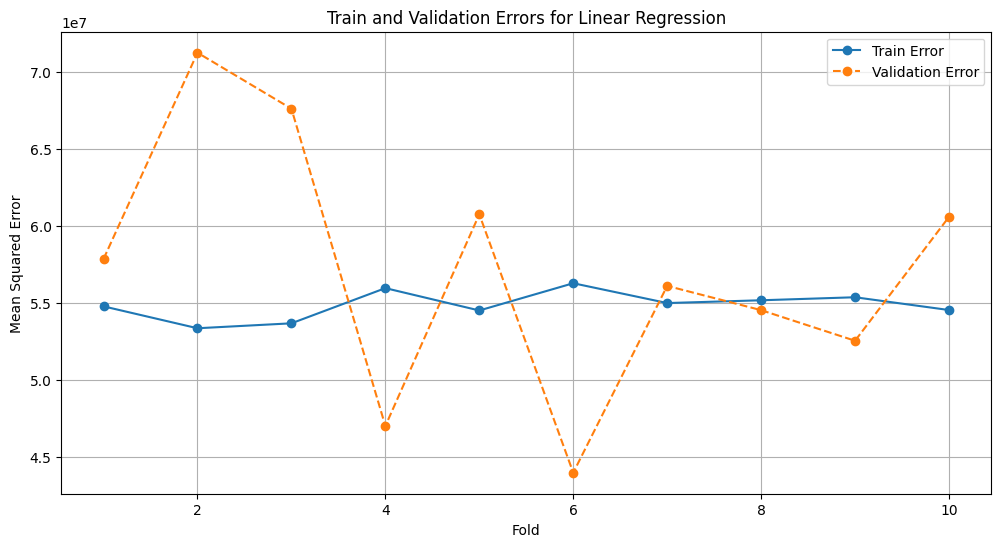

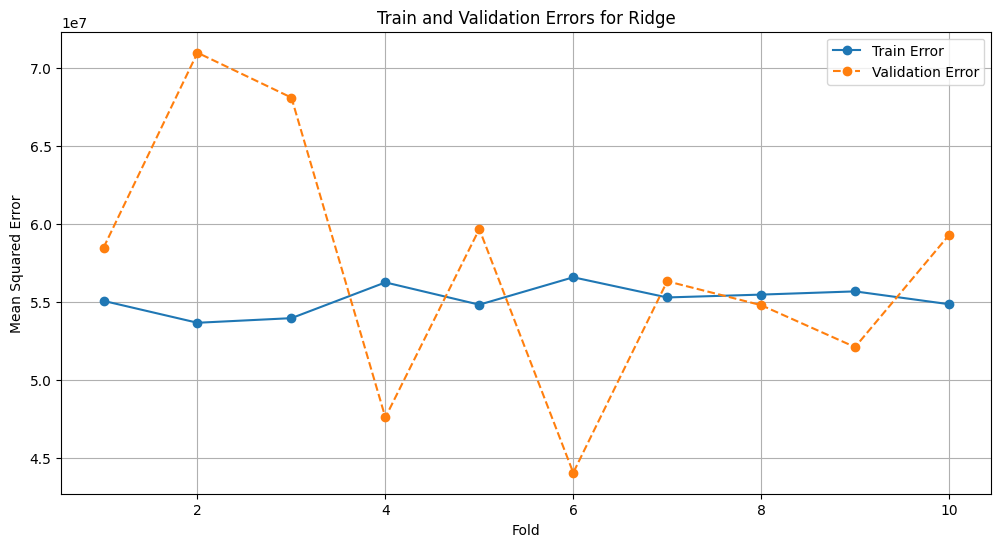

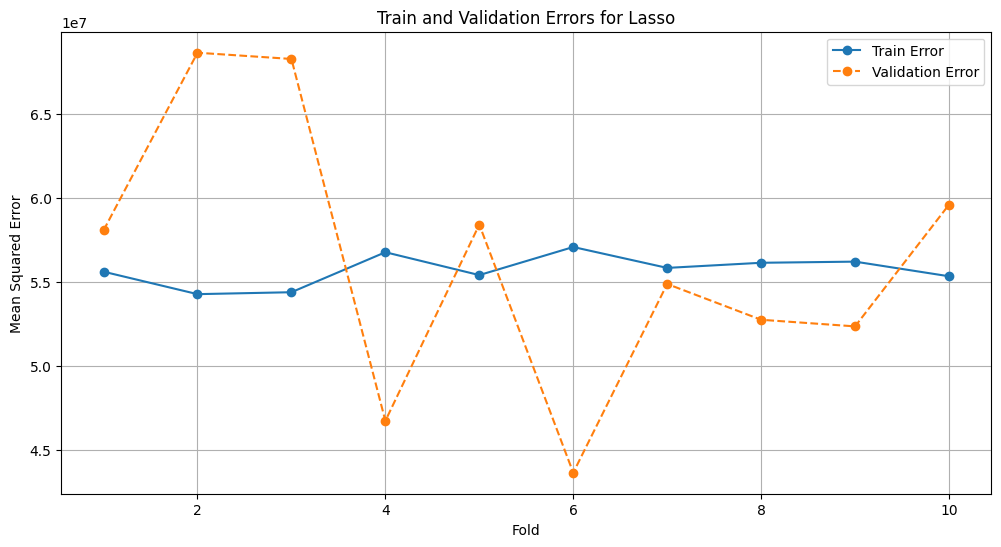

In [73]:
for model_name, metrics in results.items():
    folds = list(range(1, len(metrics['Train Errors']) + 1))

    plt.figure(figsize=(12, 6))
    plt.plot(folds, metrics['Train Errors'], marker='o', linestyle='-', label='Train Error')
    plt.plot(folds, metrics['Validation Errors'], marker='o', linestyle='--', label='Validation Error')
    plt.title(f'Train and Validation Errors for {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

In [74]:
for model_name, model in models.items():
    print(f"\nFinal evaluation on test set for model: {model_name}")

    best_model_params = results[model_name]['Best Parameters'][-1]
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    pipeline.fit(X_train, y_train)

    y_test_pred = pipeline.predict(X_test)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"Test MSE: {test_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test R2: {test_r2}")
    print(f"Test MAE: {test_mae}")


Final evaluation on test set for model: Linear Regression
Test MSE: 51308839.854884036
Test RMSE: 7163.018906500529
Test R2: 0.7640658521950819
Test MAE: 5252.76715069284

Final evaluation on test set for model: Ridge
Test MSE: 51299859.68758102
Test RMSE: 7162.392036713783
Test R2: 0.7641071458225694
Test MAE: 5252.961640387126

Final evaluation on test set for model: Lasso
Test MSE: 51222560.73345563
Test RMSE: 7156.993833548806
Test R2: 0.7644625906722164
Test MAE: 5248.528488287069


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.919e+08, tolerance: 7.297e+07



Lasso Regression is the most effective model based on the evaluation metrics

Ridge Regression is a close second, with Linear Regression trailing slightly behind in terms of predictive accuracy.

**the following code assesses feature importance for each model by measuring how model performance changes when each feature is shuffled. It then shows the mean importance and standard deviation for each feature in a sorted table.**

In [75]:
for model_name, model in models.items():
    print(f"\nFeature Importance for model: {model_name}")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    result = permutation_importance(
        pipeline, X_train, y_train, n_repeats=10, random_state=42
    )

    importances = result.importances_mean
    std = result.importances_std

    feature_importance_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": importances, "Std": std}
    )

    feature_importance_df = feature_importance_df.sort_values(
        by="Importance", ascending=False
    )

    print(feature_importance_df)


Feature Importance for model: Linear Regression
                                Feature    Importance           Std
11                    Shelf Life (days)  9.322188e+22  1.365895e+21
30                Days Until Expiration  3.395935e+22  5.605011e+20
31                Days Since Production  3.141480e+22  5.863152e+20
32                 Shelf Life Remaining  2.969279e+22  4.900813e+20
29                         Avg Quantity  6.740846e+21  6.461458e+19
40      Avg Reorder Qunatity by Product  4.875473e+21  6.558387e+19
6                          Product Name  4.630026e+21  6.244753e+19
28                       Avg Unit Price  4.342772e+21  4.559680e+19
5                            Product ID  4.138728e+21  6.914846e+19
34                Price Difference Mean  1.278968e+21  2.119103e+19
7                                 Brand  2.616724e+20  3.695320e+18
39        Avg Reorder Qunatity by Brand  2.349575e+20  4.376656e+18
37          Avg Price per Unit by Brand  1.367819e+20  1.874212e+18

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.919e+08, tolerance: 7.297e+07



                                Feature    Importance           Std
10                          Total Value  9.521205e-01  1.752917e-02
38                             Category  6.248309e-01  9.018281e-03
8                  Quantity (liters/kg)  1.726584e-01  4.775025e-03
33                     Price Difference  5.336655e-03  9.372594e-04
11                    Shelf Life (days)  4.094721e-03  9.623475e-04
29                         Avg Quantity  2.837457e-03  5.597799e-04
37          Avg Price per Unit by Brand  2.755128e-03  6.977630e-04
15                    Customer Location  2.480084e-03  5.583804e-04
40      Avg Reorder Qunatity by Product  2.009829e-03  5.123263e-04
0                              Location  1.744967e-03  6.228592e-04
6                          Product Name  1.297219e-03  5.703964e-04
9                        Price per Unit  1.016919e-03  3.305982e-04
7                                 Brand  1.016553e-03  2.846857e-04
39        Avg Reorder Qunatity by Brand  6.99542



*   ***Total Value, Category, and Quantity (liters/kg)*** are the top features across all models, indicating they have a significant impact on the target variable.
*   ***Linear Regression*** shows unusually large feature importances for variables like ***Shelf Life and Days Until Expiration***, suggesting possible issues like multicollinearity or poor scaling in the dataset. These values need further investigation as they are not mirrored in Ridge or Lasso.
*   Both ***Ridge and Lasso*** models assign more reasonable importances and help in feature selection by shrinking less relevant features. Lasso, in particular, reduces several features' importance to zero, highlighting its feature selection capability.
*   Features such as date components ***(e.g., Date_Year, Date_Month, and Production_Date)*** have zero importance in Ridge and Lasso, indicating they do not contribute much to the prediction.




# **Conclusion**

## **Modeling Approach and Initial Results**
We began by applying **Linear Regression** without any additional feature engineering. This initial model served as a baseline, achieving an accuracy of around 50%. While this provided a starting point, it was evident that the model was underfitting, and further improvements were needed.

## **Feature Engineering for Improved Accuracy**
To enhance the model’s performance, we created new features from the existing dataset. This step allowed us to capture more complex relationships in the data, which were not initially evident. The addition of these features helped improve model accuracy by incorporating more relevant information into the predictive process.

## **Pipeline and Model Selection**
Next, we constructed a pipeline that streamlined the preprocessing and modeling steps. We tested multiple regression models, including **Linear Regression**, **Ridge Regression**, and **Lasso Regression**. By using this pipeline, we were able to efficiently manage the different models and apply hyperparameter tuning.

## **K-Fold Cross-Validation for Parameter Tuning**
We employed **K-Fold Cross-Validation** to optimize the model parameters and evaluate performance across multiple folds. This method provided reliable estimates of the model's generalization ability. We also computed various error metrics, such as training, validation, and test errors, to get a comprehensive view of the model's performance.

## **Feature Importance Analysis**
To further understand the model’s predictions, we performed a **Feature Importance Analysis** using **Permutation Importance**. This technique helped us identify which features had the greatest impact on the model's predictions. By analyzing feature importance for each model, we gained valuable insights into the key drivers of revenue prediction. Features were ranked by their importance, enabling us to interpret how different factors influenced the target variable.

## **Model Performance and Final Accuracy**
The model showed consistent improvement after tuning. During the training and validation phase, the accuracy reached around 72-73%. When applied to the test set, the model achieved a final accuracy of approximately 76%. This represents a significant improvement over the initial results.

## **Conclusion**
Through feature engineering, pipeline optimization, rigorous cross-validation, and feature importance analysis, we were able to enhance model performance from 50% to 76% accuracy. The use of Ridge and Lasso models further demonstrated the benefits of regularization techniques in improving predictive accuracy and controlling overfitting. The feature importance analysis also provided a clearer understanding of which features contribute the most to revenue prediction, offering valuable insights for decision-making.

